# EDA for Covid-19 data in Mexico

**Objective**: This notebook outlines the Exploratory Data Analysis (EDA) of Covid-19 data from Mexico focusing on understanding the key patterns and trends necesarry for developing a compaprtmental epidemiological model of the disease. The primary goal of this EDA is to etract meaningfull insights from the data that can inform the future selection of model parameters and highlights the dynamic behaviour of the disease across different regions and time periods. By thoroughly examining the data, we aim to uncover underlying patterns such as the distribution of onset to death and onset to hospitalization, regional variations in confirmed cases and deaths, and temporal trends that reflect changes in infection dynamics.

**Key Steps:**

1. **Understanding delays in reports:** Analyze the discrepancies between the reporting timelines of cases, hospitalizations, and deaths to adjust model assumptions and account for reporting inneficiencies.
2. **Descriptive Statistics and Data Visualization:** To provide an overview of the data, including key distributions, temporal trends, and regional differences.
3. **Analysis of Onset to Event Timeframes:** Investigating onset to death and onset to hospitalization intervals to better understand the progression of severe cases and delays in reporting.
4. **Spatial Analysis:** Examining how case counts and death rates vary across different states and over time, which is crucial for accurately modeling spatial heterogeneity in the disease spread.
5. **Time Series Analysis:** Identifying seasonality, trends, and potential changes in the effective contact rate, which will inform the design of the time-varying components of the model.

In [1]:
# Import all necesary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.dates as mdates
import geopandas as gpd
import plotly.express as px
import seaborn as sns
from datetime import datetime
from itertools import product
from mpl_toolkits.axes_grid1 import make_axes_locatable


### 1. Understanding Delays in Reports


In this section, we will seek to understand the magnitude of the delays in case and death reports. To do so, we shall rely on the `final_data_2020_08_01_df`, `final_data_2020_08_08_df`, and `final_data_2020_08_15_df` dataframes previously derived through the ETL process

In [2]:
# Load the DataFrames from the ETL pickle files
state_data_2020_08_01 = pd.read_pickle('/Users/ro/Desktop/Undergrad_AM_Thesis/Data/final_data_2020_08_01_df.pkl')
state_data_2020_08_08 = pd.read_pickle('/Users/ro/Desktop/Undergrad_AM_Thesis/Data/final_data_2020_08_08_df.pkl')
state_data_2020_08_15 = pd.read_pickle('/Users/ro/Desktop/Undergrad_AM_Thesis/Data/final_data_2020_08_15_df.pkl')

print(state_data_2020_08_01.tail())
print(state_data_2020_08_08.tail())
print(state_data_2020_08_15.tail())

           date  state  confirmed_cases  confirmed_deaths
6459 2020-08-01     28              0.0               0.0
6460 2020-08-01     29              0.0               0.0
6461 2020-08-01     30              0.0               0.0
6462 2020-08-01     31              0.0               0.0
6463 2020-08-01     32              0.0               0.0
           date  state  confirmed_cases  confirmed_deaths
6683 2020-08-08     28              0.0               0.0
6684 2020-08-08     29              0.0               0.0
6685 2020-08-08     30              0.0               0.0
6686 2020-08-08     31              0.0               0.0
6687 2020-08-08     32              0.0               0.0
           date  state  confirmed_cases  confirmed_deaths
6907 2020-08-15     28              0.0               0.0
6908 2020-08-15     29              0.0               0.0
6909 2020-08-15     30              0.0               0.0
6910 2020-08-15     31              0.0               0.0
6911 2020-08-1

In [3]:
# Aggregate data to national level
national_data_2020_08_01 = state_data_2020_08_01.groupby('date').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()

national_data_2020_08_08 = state_data_2020_08_08.groupby('date').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()

national_data_2020_08_15 = state_data_2020_08_15.groupby('date').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()

In [4]:
national_data_2020_08_01[-14:]

,date,confirmed_cases,confirmed_deaths
188,2020-07-19,4996.0,545.0
189,2020-07-20,6774.0,532.0
190,2020-07-21,3944.0,548.0
191,2020-07-22,3514.0,479.0
192,2020-07-23,3184.0,464.0
193,2020-07-24,3035.0,430.0
194,2020-07-25,2961.0,427.0
195,2020-07-26,1694.0,440.0
196,2020-07-27,1597.0,332.0
197,2020-07-28,797.0,356.0


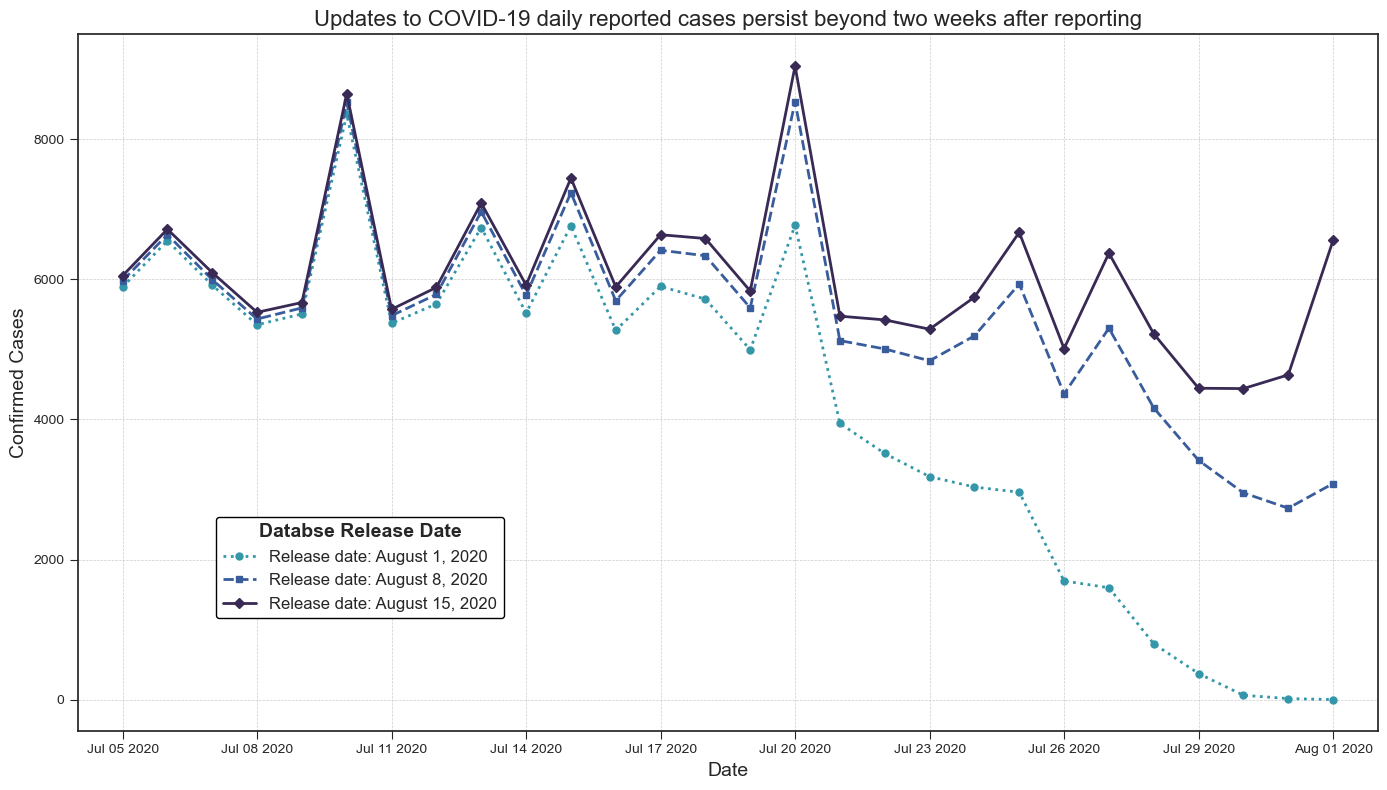

In [5]:
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('mako',4) 

# Define the date range
start_date = pd.Timestamp('2020-07-05')
end_date = pd.Timestamp('2020-08-01')

# Filter each dataset within the desired date range
plot_data_2020_08_01 = national_data_2020_08_01[(national_data_2020_08_01['date'] >= start_date) & (national_data_2020_08_01['date'] <= end_date)]
plot_data_2020_08_08 = national_data_2020_08_08[(national_data_2020_08_08['date'] >= start_date) & (national_data_2020_08_08['date'] <= end_date)]
plot_data_2020_08_15 = national_data_2020_08_15[(national_data_2020_08_15['date'] >= start_date) & (national_data_2020_08_15['date'] <= end_date)]

# Plotting the filtered data
plt.figure(figsize=(14, 8))
plt.plot(plot_data_2020_08_01['date'], plot_data_2020_08_01['confirmed_cases'], 
         color=colors[2], marker='o', linestyle='dotted', linewidth=2, markersize=5, label='Release date: August 1, 2020')
plt.plot(plot_data_2020_08_08['date'], plot_data_2020_08_08['confirmed_cases'], 
         color=colors[1], marker='s', linestyle= 'dashed', linewidth=2, markersize=5, label='Release date: August 8, 2020')
plt.plot(plot_data_2020_08_15['date'], plot_data_2020_08_15['confirmed_cases'], 
         color=colors[0], marker='D', linewidth=2, markersize=5, label='Release date: August 15, 2020')

# Formatting the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xlim(start_date-pd.Timedelta(days=1), end_date + pd.Timedelta(days=1))


plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed Cases', fontsize=14)
plt.title('Updates to COVID-19 daily reported cases persist beyond two weeks after reporting', fontsize=16)
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    loc='lower left',  
    bbox_to_anchor=(0.1, 0.15), 
    fontsize=12, 
    title='Databse Release Date', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white'               
)
plt.tight_layout()
plt.show()

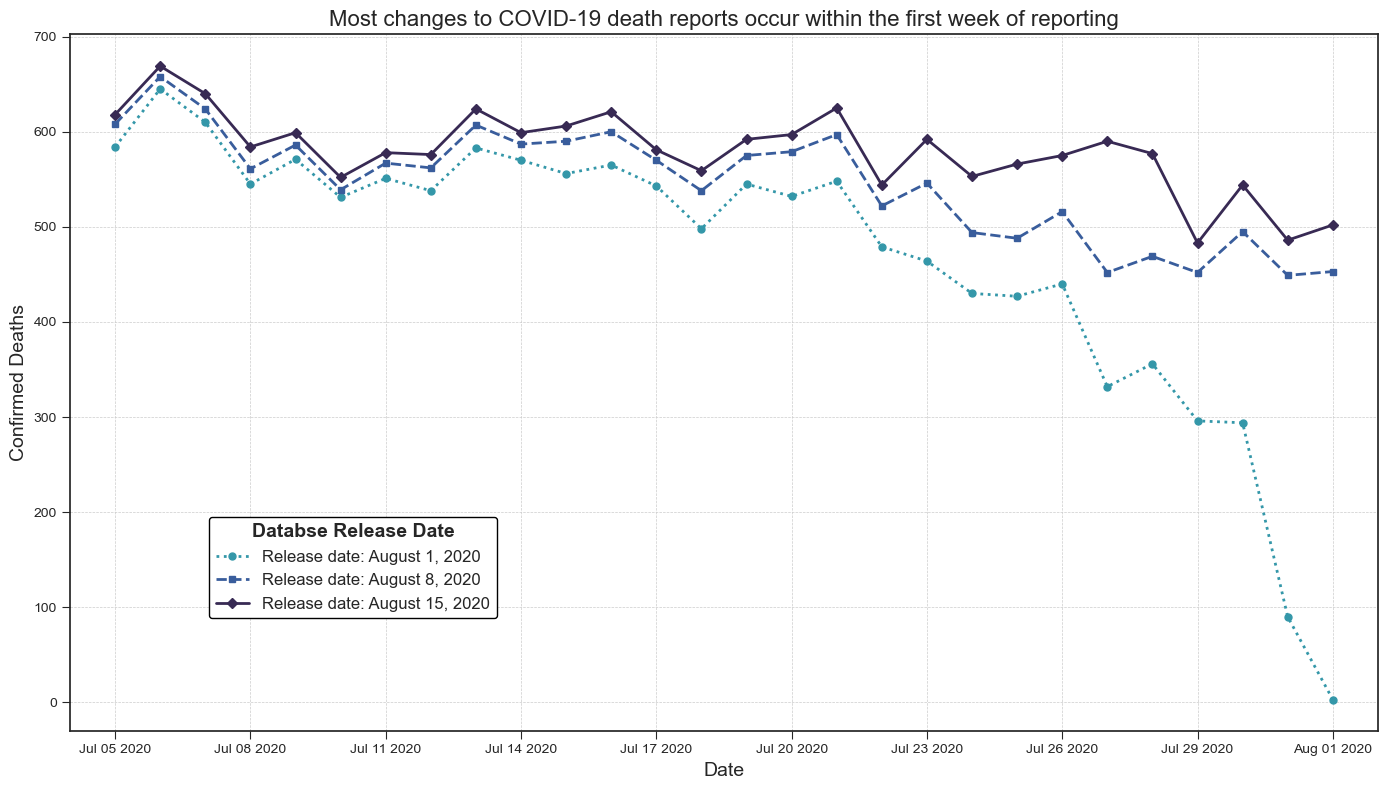

In [6]:
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('mako',4) 

# Define the date range
start_date = pd.Timestamp('2020-07-05')
end_date = pd.Timestamp('2020-08-01')

# Filter each dataset within the desired date range
plot_data_2020_08_01 = national_data_2020_08_01[(national_data_2020_08_01['date'] >= start_date) & (national_data_2020_08_01['date'] <= end_date)]
plot_data_2020_08_08 = national_data_2020_08_08[(national_data_2020_08_08['date'] >= start_date) & (national_data_2020_08_08['date'] <= end_date)]
plot_data_2020_08_15 = national_data_2020_08_15[(national_data_2020_08_15['date'] >= start_date) & (national_data_2020_08_15['date'] <= end_date)]

# Plotting the filtered data
plt.figure(figsize=(14, 8))
plt.plot(plot_data_2020_08_01['date'], plot_data_2020_08_01['confirmed_deaths'], 
         color=colors[2], marker='o', linestyle='dotted', linewidth=2, markersize=5, label='Release date: August 1, 2020')
plt.plot(plot_data_2020_08_08['date'], plot_data_2020_08_08['confirmed_deaths'], 
         color=colors[1], marker='s', linestyle= 'dashed', linewidth=2, markersize=5, label='Release date: August 8, 2020')
plt.plot(plot_data_2020_08_15['date'], plot_data_2020_08_15['confirmed_deaths'], 
         color=colors[0], marker='D', linewidth=2, markersize=5, label='Release date: August 15, 2020')

# Formatting the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xlim(start_date-pd.Timedelta(days=1), end_date + pd.Timedelta(days=1))

plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed Deaths', fontsize=14)
plt.title('Most changes to COVID-19 death reports occur within the first week of reporting', fontsize=16)
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    loc='lower left',  
    bbox_to_anchor=(0.1, 0.15), 
    fontsize=12, 
    title='Databse Release Date', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white'               
)
plt.tight_layout()
plt.show()

In [7]:
onset_to_hospital_df = pd.read_pickle('/Users/ro/Desktop/Undergrad_AM_Thesis/Data/onset_to_hospital_df.pkl')
onset_to_hospital_df

,onset_date,hospital_date,state,gender,age,OnsetToHospital
0,2020-11-30,2020-12-06,24,1,55,6
1,2020-07-20,2020-07-28,8,2,35,8
2,2020-06-10,2020-06-12,31,1,56,2
3,2020-05-30,2020-06-02,1,1,58,3
4,2020-06-30,2020-07-01,31,2,37,1
...,...,...,...,...,...,...
7712610,2023-08-27,2023-08-27,15,1,49,0
7712611,2023-08-28,2023-08-28,15,1,27,0
7712612,2023-08-28,2023-08-28,15,2,26,0
7712613,2023-08-29,2023-08-29,9,2,68,0


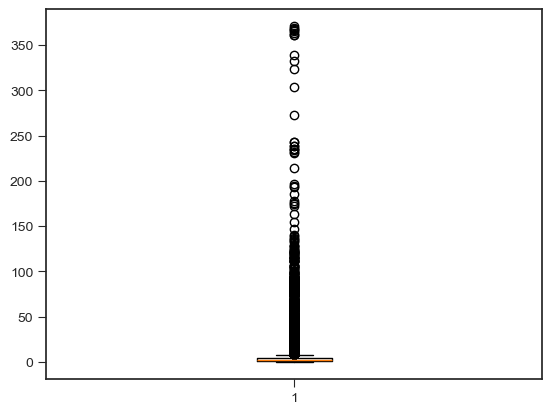

13.0


In [8]:
plt.boxplot(onset_to_hospital_df['OnsetToHospital'])
plt.show()
print(onset_to_hospital_df['OnsetToHospital'].quantile(0.99))

In [11]:
# Filter out data beyond the 99th quantile
OTH_99Q = onset_to_hospital_df[onset_to_hospital_df['OnsetToHospital'] <= onset_to_hospital_df['OnsetToHospital'].quantile(0.99)].reset_index(drop=True)
OTH_99Q

,onset_date,hospital_date,state,gender,age,OnsetToHospital
0,2020-11-30,2020-12-06,24,1,55,6
1,2020-07-20,2020-07-28,8,2,35,8
2,2020-06-10,2020-06-12,31,1,56,2
3,2020-05-30,2020-06-02,1,1,58,3
4,2020-06-30,2020-07-01,31,2,37,1
...,...,...,...,...,...,...
7648398,2023-08-27,2023-08-27,15,1,49,0
7648399,2023-08-28,2023-08-28,15,1,27,0
7648400,2023-08-28,2023-08-28,15,2,26,0
7648401,2023-08-29,2023-08-29,9,2,68,0


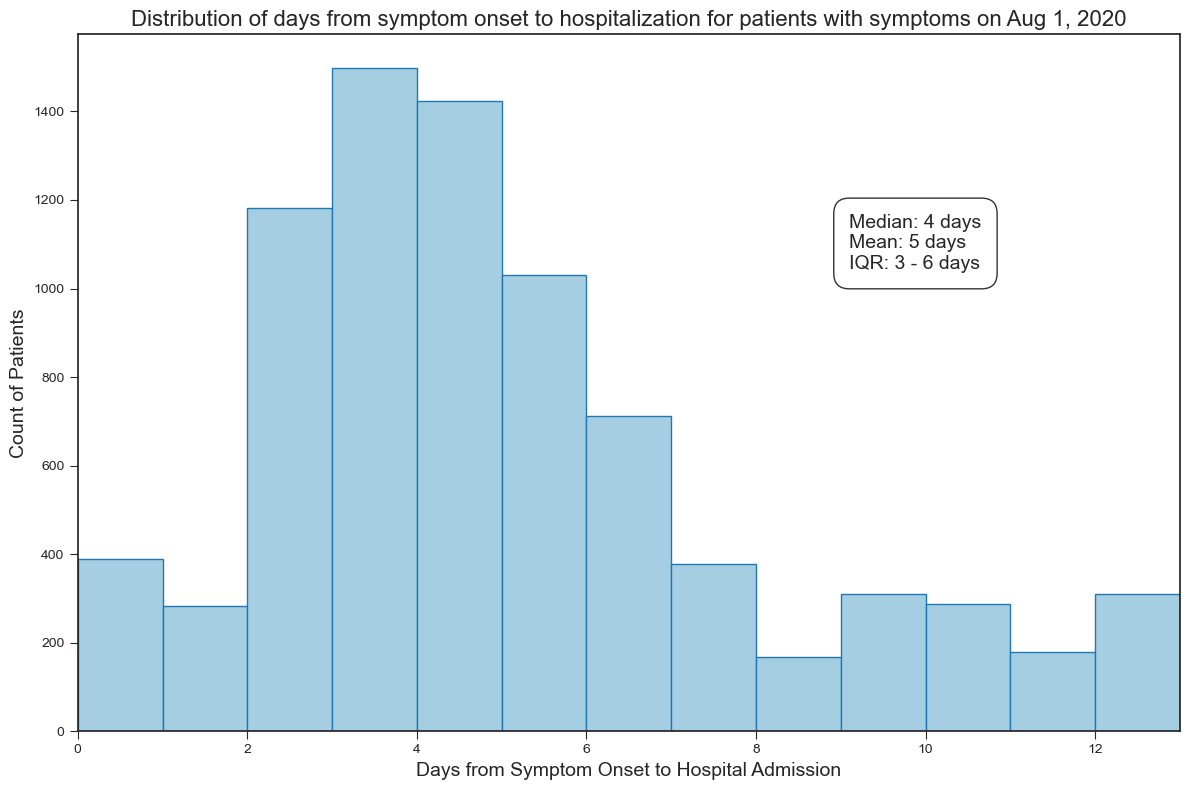

In [12]:
# Filter data for patients who had symptoms on August 1, 2020
filtered_data = OTH_99Q[OTH_99Q['onset_date'] == pd.Timestamp(2020, 8, 1)]

# Calculate descriptive statistics: 25th percentile (Q1), 75th percentile (Q3), median, and mean
q25 = filtered_data['OnsetToHospital'].quantile(0.25)
q75 = filtered_data['OnsetToHospital'].quantile(0.75)
median_value = filtered_data['OnsetToHospital'].median()
mean_value = round(filtered_data['OnsetToHospital'].mean(), 1)

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(12, 8))

# Plot histogram of 'OnsetToHospital' days for filtered data
plt.hist(filtered_data['OnsetToHospital'],
         bins=13, 
         color=sns.color_palette('Paired')[0], 
         edgecolor=sns.color_palette('Paired')[1]) 

# Create text string for descriptive statistics box
textstr = (
    f"Median: {median_value:.0f} days\n"
    f"Mean: {mean_value:.0f} days\n"
    f"IQR: {q25:.0f} - {q75:.0f} days"
)

# Add a text box on the plot with the descriptive statistics
plt.gca().text(
    0.7, 0.7, textstr, transform=plt.gca().transAxes,
    fontsize=14, verticalalignment='center', horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.8')  # Customize the box style and padding
)

# Set the plot title and axis labels
plt.title('Distribution of days from symptom onset to hospitalization for patients with symptoms on Aug 1, 2020', fontsize=16)
plt.xlim(0, 13)
plt.xlabel('Days from Symptom Onset to Hospital Admission', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)

plt.tight_layout()
plt.show()


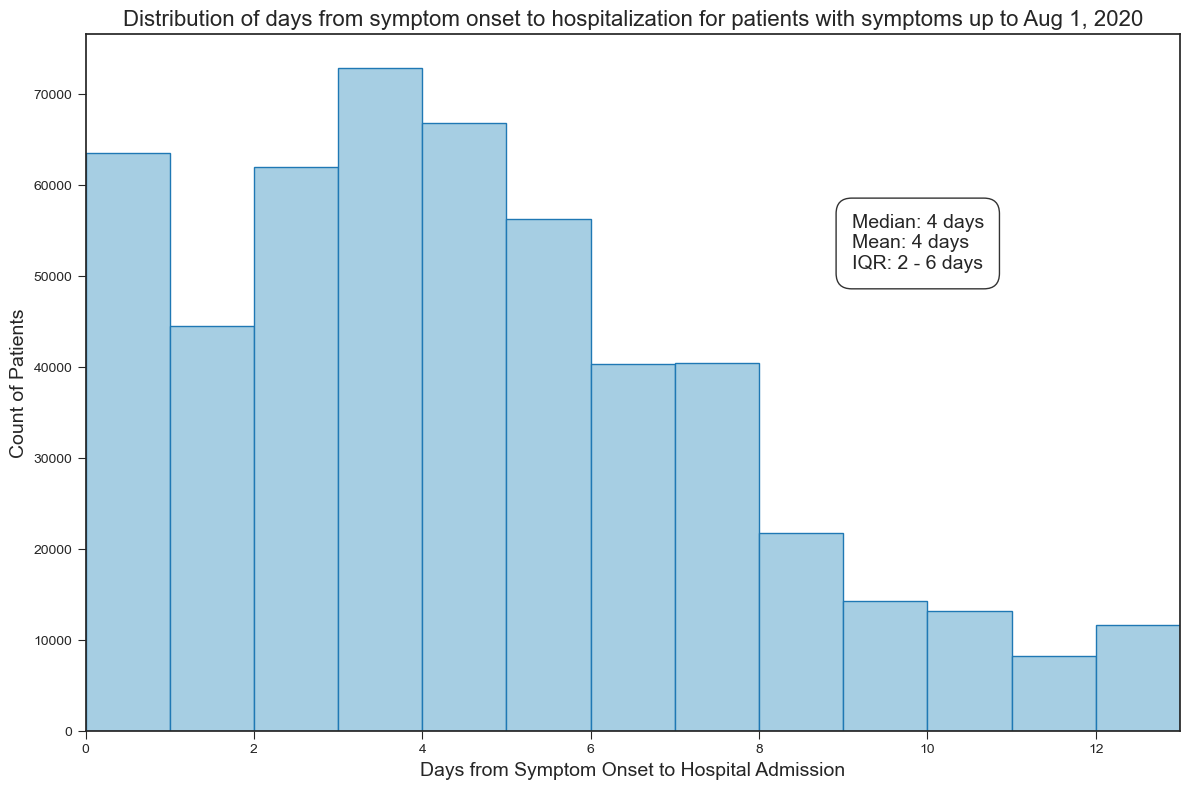

In [13]:
# Filter data for patients who had symptoms up to August 1, 2020
filtered_data = OTH_99Q[OTH_99Q['onset_date'] <= pd.Timestamp(2020, 8, 1)]

# Calculate descriptive statistics: 25th percentile (Q1), 75th percentile (Q3), median, and mean
q25 = filtered_data['OnsetToHospital'].quantile(0.25)
q75 = filtered_data['OnsetToHospital'].quantile(0.75)
median_value = filtered_data['OnsetToHospital'].median()
mean_value = round(filtered_data['OnsetToHospital'].mean(), 1)

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(12, 8))

# Plot histogram of 'OnsetToHospital' days for filtered data
plt.hist(filtered_data['OnsetToHospital'],
         bins=13, 
         color=sns.color_palette('Paired')[0], 
         edgecolor=sns.color_palette('Paired')[1]) 

# Create text string for descriptive statistics box
textstr = (
    f"Median: {median_value:.0f} days\n"
    f"Mean: {mean_value:.0f} days\n"
    f"IQR: {q25:.0f} - {q75:.0f} days"
)

# Add a text box on the plot with the descriptive statistics
plt.gca().text(
    0.7, 0.7, textstr, transform=plt.gca().transAxes,
    fontsize=14, verticalalignment='center', horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.8')  # Customize the box style and padding
)

# Set the plot title and axis labels
plt.title('Distribution of days from symptom onset to hospitalization for patients with symptoms up to Aug 1, 2020', fontsize=16)
plt.xlim(0, 13)
plt.xlabel('Days from Symptom Onset to Hospital Admission', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)

plt.tight_layout()
plt.show()

In [61]:
onset_to_death_df = pd.read_pickle('/Users/ro/Desktop/Undergrad_AM_Thesis/Data/onset_to_death_df.pkl')
onset_to_death_df['HospitalToDeath'] = (onset_to_death_df['death_date']-onset_to_death_df['hospital_date']).dt.days
onset_to_death_df

,onset_date,hospital_date,death_date,state,gender,age,OnsetToDeath,HospitalToDeath
0,2020-07-17,2020-07-20,2020-07-21,23,1,66,4.0,1
1,2020-12-12,2020-12-14,2020-12-17,15,2,58,5.0,3
2,2020-12-15,2020-12-15,2020-12-15,32,1,30,0.0,0
3,2020-06-22,2020-06-28,2020-06-28,28,2,53,6.0,0
4,2020-03-16,2020-03-16,2020-03-28,5,2,47,12.0,12
...,...,...,...,...,...,...,...,...
334777,2023-12-16,2023-12-17,2023-12-31,20,2,64,15.0,14
334778,2023-12-30,2024-01-10,2024-01-29,11,2,77,30.0,19
334779,2023-12-22,2023-12-27,2023-12-28,11,2,41,6.0,1
334780,2023-02-07,2023-02-07,2023-02-13,15,1,41,6.0,6


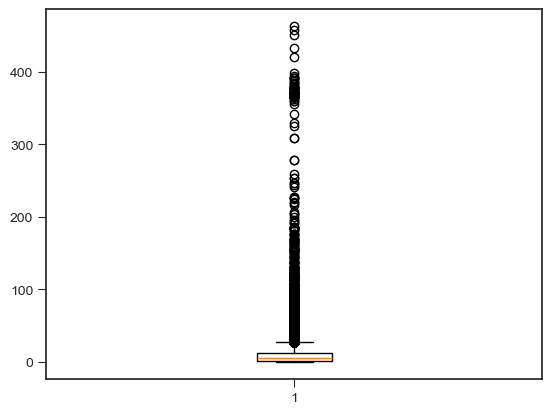

39.0


In [15]:
plt.boxplot(onset_to_death_df['HospitalToDeath'])
plt.show()
print(onset_to_death_df['HospitalToDeath'].quantile(0.99))

In [44]:
# Filter out data beyond the 99th quantile
OTD_99Q = onset_to_death_df[onset_to_death_df['HospitalToDeath'] <= onset_to_death_df['HospitalToDeath'].quantile(0.99)].copy().reset_index(drop=True)
OTD_99Q

,onset_date,hospital_date,death_date,state,gender,age,OnsetToDeath,HospitalToDeath
0,2020-07-17,2020-07-20,2020-07-21,23,1,66,4.0,1
1,2020-12-12,2020-12-14,2020-12-17,15,2,58,5.0,3
2,2020-12-15,2020-12-15,2020-12-15,32,1,30,0.0,0
3,2020-06-22,2020-06-28,2020-06-28,28,2,53,6.0,0
4,2020-03-16,2020-03-16,2020-03-28,5,2,47,12.0,12
...,...,...,...,...,...,...,...,...
331463,2023-12-16,2023-12-17,2023-12-31,20,2,64,15.0,14
331464,2023-12-30,2024-01-10,2024-01-29,11,2,77,30.0,19
331465,2023-12-22,2023-12-27,2023-12-28,11,2,41,6.0,1
331466,2023-02-07,2023-02-07,2023-02-13,15,1,41,6.0,6


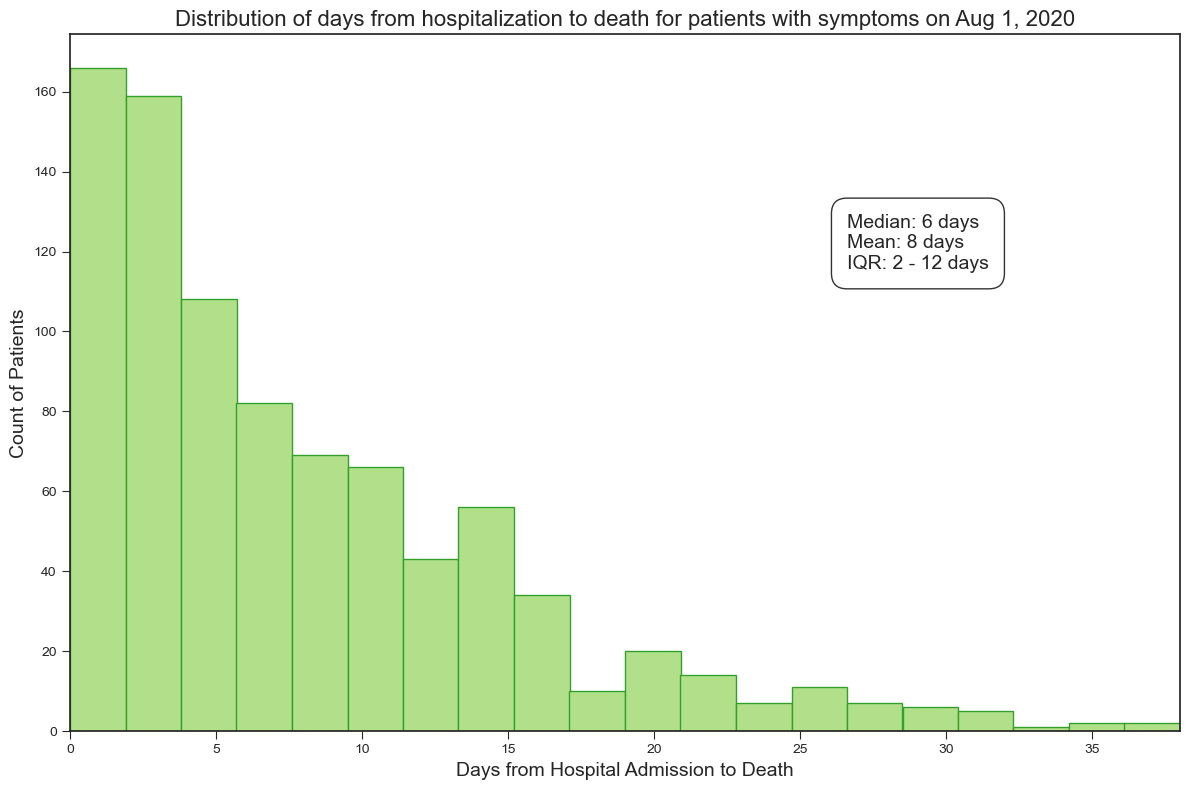

In [17]:
# Filter data for patients who had symptoms on August 1, 2020
filtered_data = OTD_99Q[OTD_99Q['onset_date'] == pd.Timestamp(2020, 8, 1)]

# Calculate descriptive statistics: 25th percentile (Q1), 75th percentile (Q3), median, and mean
q25 = filtered_data['HospitalToDeath'].quantile(0.25)
q75 = filtered_data['HospitalToDeath'].quantile(0.75)
median_value = filtered_data['HospitalToDeath'].median()
mean_value = round(filtered_data['HospitalToDeath'].mean(), 1)

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(12, 8))

# Plot histogram of 'OnsetToHospital' days for filtered data
plt.hist(filtered_data['HospitalToDeath'],
         bins=20, 
         color=sns.color_palette('Paired')[2], 
         edgecolor=sns.color_palette('Paired')[3]) 

# Create text string for descriptive statistics box
textstr = (
    f"Median: {median_value:.0f} days\n"
    f"Mean: {mean_value:.0f} days\n"
    f"IQR: {q25:.0f} - {q75:.0f} days"
)

# Add a text box on the plot with the descriptive statistics
plt.gca().text(
    0.7, 0.7, textstr, transform=plt.gca().transAxes,
    fontsize=14, verticalalignment='center', horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.8')  # Customize the box style and padding
)

# Set the plot title and axis labels
plt.title('Distribution of days from hospitalization to death for patients with symptoms on Aug 1, 2020', fontsize=16)
plt.xlim(0, filtered_data['HospitalToDeath'].max())
plt.xlabel('Days from Hospital Admission to Death', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)

plt.tight_layout()
plt.show()

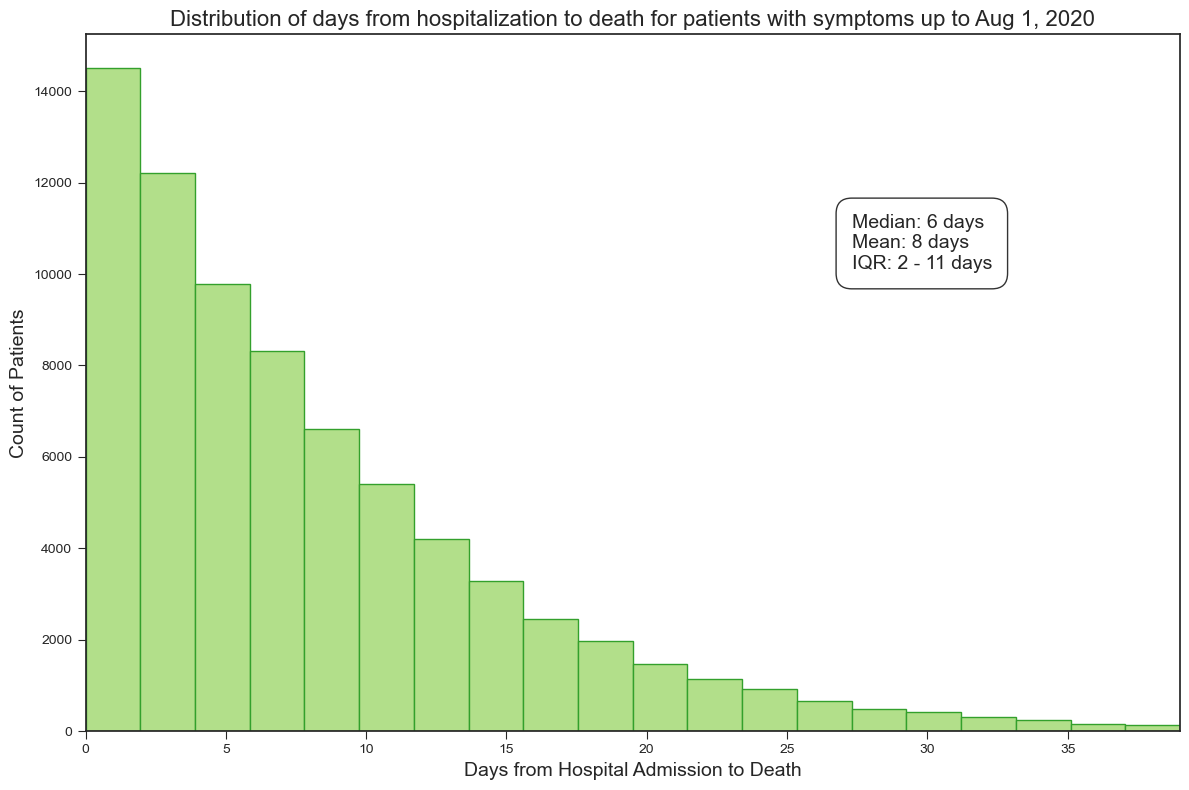

In [18]:
# Filter data for patients who had symptoms up to August 1, 2020
filtered_data = OTD_99Q[OTD_99Q['onset_date'] <= pd.Timestamp(2020, 8, 1)]

# Calculate descriptive statistics: 25th percentile (Q1), 75th percentile (Q3), median, and mean
q25 = filtered_data['HospitalToDeath'].quantile(0.25)
q75 = filtered_data['HospitalToDeath'].quantile(0.75)
median_value = filtered_data['HospitalToDeath'].median()
mean_value = round(filtered_data['HospitalToDeath'].mean(), 1)

plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(12, 8))

# Plot histogram of 'OnsetToHospital' days for filtered data
plt.hist(filtered_data['HospitalToDeath'],
         bins=20, 
         color=sns.color_palette('Paired')[2], 
         edgecolor=sns.color_palette('Paired')[3]) 

# Create text string for descriptive statistics box
textstr = (
    f"Median: {median_value:.0f} days\n"
    f"Mean: {mean_value:.0f} days\n"
    f"IQR: {q25:.0f} - {q75:.0f} days"
)

# Add a text box on the plot with the descriptive statistics
plt.gca().text(
    0.7, 0.7, textstr, transform=plt.gca().transAxes,
    fontsize=14, verticalalignment='center', horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.8')  # Customize the box style and padding
)

# Set the plot title and axis labels
plt.title('Distribution of days from hospitalization to death for patients with symptoms up to Aug 1, 2020', fontsize=16)
plt.xlim(0, filtered_data['HospitalToDeath'].max())
plt.xlabel('Days from Hospital Admission to Death', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)

plt.tight_layout()
plt.show()

**Conclusion:** Although the average time bewteen symptom onset and hospitalization (5 days) is shorter than the average time between hospitalization and death (8 days), the longer delay in COVID-19 case reporting compared to death reporting indicates an even higher inneficiency in reporting cases. While this can be attributed to the unprecedented scale and nature of the case counts during the pandemic, it is also understandable that death reporting is more efficient due to the pre-established best practices and regulated processes.

### 2. Descriptive Statistics and Data Visualization:

For this section, we will explore the key characteristics of the COVID-19 data using descriptive statistics and visualizations. We will utilize the datasets generated from the ETL process: `covid_data_df` (overall case data), `onset_to_death_df`, and `onset_to_hospital_df`.


In [19]:
covid_df = pd.read_pickle('/Users/ro/Desktop/Undergrad_AM_Thesis/Data/covid_df.pkl')
covid_df

,date,state,confirmed_cases,confirmed_deaths
0,2020-02-19,1,0.0,0.0
1,2020-02-19,2,0.0,0.0
2,2020-02-19,3,0.0,0.0
3,2020-02-19,4,0.0,0.0
4,2020-02-19,5,0.0,0.0
...,...,...,...,...
45179,2023-12-31,28,0.0,0.0
45180,2023-12-31,29,1.0,0.0
45181,2023-12-31,30,0.0,0.0
45182,2023-12-31,31,0.0,0.0


In [20]:
# Aggregate data at national level
national_df = covid_df.groupby('date').agg(
    {'confirmed_cases': 'sum',
     'confirmed_deaths': 'sum'
    }).reset_index()

national_df

,date,confirmed_cases,confirmed_deaths
0,2020-02-19,1.0,0.0
1,2020-02-20,0.0,0.0
2,2020-02-21,0.0,0.0
3,2020-02-22,2.0,0.0
4,2020-02-23,1.0,0.0
...,...,...,...
1407,2023-12-27,16.0,1.0
1408,2023-12-28,13.0,2.0
1409,2023-12-29,12.0,0.0
1410,2023-12-30,16.0,0.0


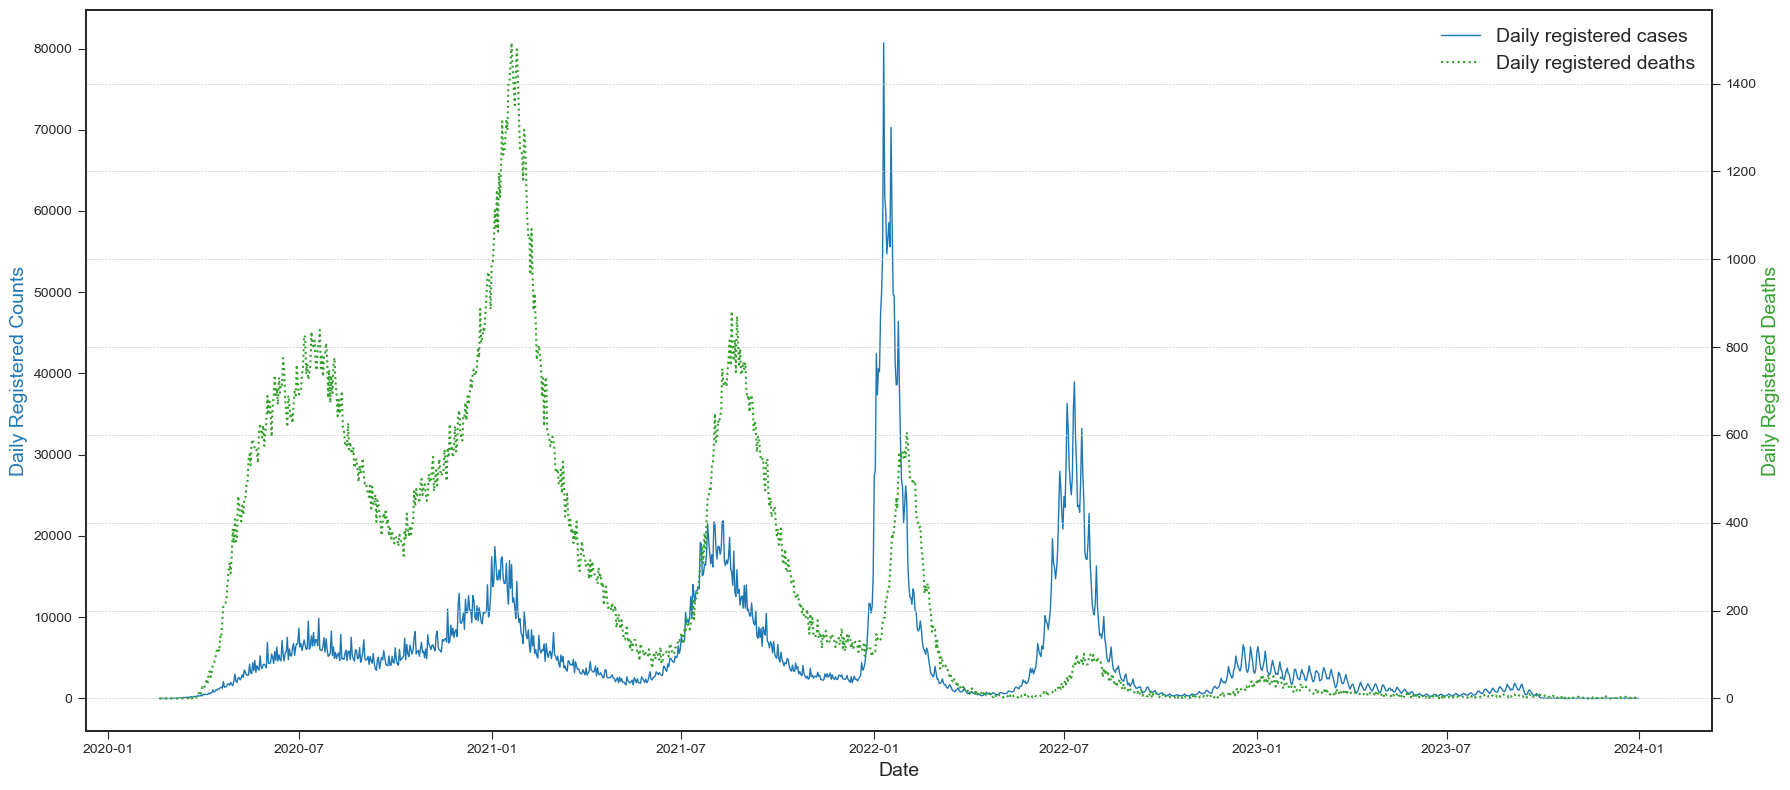

In [94]:
plt.style.use('seaborn-v0_8-ticks')
fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(national_df['date'], national_df['confirmed_cases'], linewidth=1, linestyle='solid', color=sns.color_palette('Paired')[1], label='Daily registered cases')
ax1.set_ylabel('Daily Registered Counts', color=sns.color_palette('Paired')[1], fontsize=14)

ax2 = ax1.twinx()
ax2.plot(national_df['date'], national_df['confirmed_deaths'], linewidth=1.5, linestyle='dotted', color=sns.color_palette('Paired')[3], label='Daily registered deaths')
ax2.set_ylabel('Daily Registered Deaths', color=sns.color_palette('Paired')[3], fontsize=14)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=14)

ax1.set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

In [79]:
onset_to_death_df.groupby('death_date').size().reset_index(name='confirmed_cases')

,death_date,confirmed_cases
0,2020-03-18,3
1,2020-03-20,1
2,2020-03-22,2
3,2020-03-23,1
4,2020-03-24,3
...,...,...
1362,2024-01-07,1
1363,2024-01-10,1
1364,2024-01-11,1
1365,2024-01-25,1


In [668]:
data = pd.read_csv('/Users/ro/Downloads/200801COVID19MEXICO.csv', encoding='latin1')

#Convert object to date time format
data['FECHA_INGRESO'] = pd.to_datetime(data['FECHA_INGRESO'])
data['FECHA_SINTOMAS'] = pd.to_datetime(data['FECHA_SINTOMAS'])
data['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data['FECHA_DEF'] = pd.to_datetime(data['FECHA_DEF'])

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_30520/3856416641.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/ro/Downloads/200801COVID19MEXICO.csv', encoding='latin1')
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_30520/3856416641.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)


In [669]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999697 entries, 0 to 999696
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FECHA_ACTUALIZACION  999697 non-null  object        
 1   ID_REGISTRO          999697 non-null  object        
 2   ORIGEN               999697 non-null  int64         
 3   SECTOR               999697 non-null  int64         
 4   ENTIDAD_UM           999697 non-null  int64         
 5   SEXO                 999697 non-null  int64         
 6   ENTIDAD_NAC          999697 non-null  int64         
 7   ENTIDAD_RES          999697 non-null  int64         
 8   MUNICIPIO_RES        999697 non-null  int64         
 9   TIPO_PACIENTE        999697 non-null  int64         
 10  FECHA_INGRESO        999697 non-null  datetime64[ns]
 11  FECHA_SINTOMAS       999697 non-null  datetime64[ns]
 12  FECHA_DEF            61264 non-null   datetime64[ns]
 13  INTUBADO      

In [670]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-01,0e23f9,2,3,15,1,15,15,99,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
1,2020-08-01,14c60f,2,3,15,2,15,15,106,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
2,2020-08-01,1b640f,2,4,9,2,9,9,11,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-01,0c8a89,2,4,15,2,15,15,109,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-08-01,159028,2,4,7,1,9,7,97,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97


In [671]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [672]:
import matplotlib.pyplot as plt

# List all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


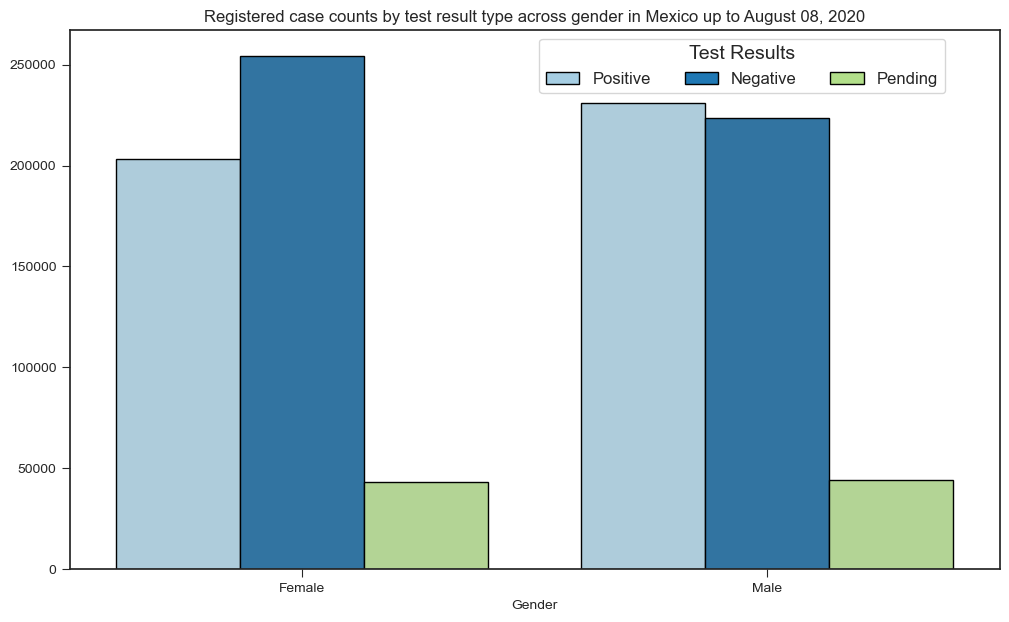

In [673]:
plt.style.use('seaborn-v0_8-ticks')

result_by_gender = data.groupby(['SEXO', 'RESULTADO']).size().reset_index(name='Count')

# Creating the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=result_by_gender, x='SEXO', y='Count', hue='RESULTADO', palette='Paired', edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('')

# Creating custom square legend handles with clear colors
custom_handles = [
    Patch(facecolor=sns.color_palette('Paired')[0], edgecolor='black', label='Positive'),
    Patch(facecolor=sns.color_palette('Paired')[1], edgecolor='black', label='Negative'),
    Patch(facecolor=sns.color_palette('Paired')[2], edgecolor='black', label='Pending')
]

plt.legend(
    handles=custom_handles,
    title='Test Results',
    loc='upper right',                # This loc is the anchor point of the legend relative to bbox_to_anchor
    bbox_to_anchor=(0.95, 1),   # Adjust x and y coordinates as needed (0.5 centers horizontally, 0.9 is near the top)
    ncol=3,                      # Keeps the legend in a single row
    fontsize=12,                 # Font size of the legend text
    title_fontsize=14,           # Font size of the legend title
    frameon=True,                # Adds a frame around the legend
    fancybox=True,               # Rounds the frame corners for aesthetics
    shadow=False                  # Adds a shadow for better separation from the plot
)
plt.title('Registered case counts by test result type across gender in Mexico up to August 08, 2020')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male']) 
plt.show()

In [674]:
confirmed_cases = data[data['RESULTADO']!=2].copy()
confirmed_cases['OnsetToDeath'] = (confirmed_cases['FECHA_DEF']-confirmed_cases['FECHA_SINTOMAS']).dt.days
confirmed_cases['OnsetToHospital'] = (confirmed_cases['FECHA_INGRESO']-confirmed_cases['FECHA_SINTOMAS']).dt.days

confirmed_cases = confirmed_cases[confirmed_cases['OnsetToDeath'] >= 0].copy()
confirmed_cases = confirmed_cases[confirmed_cases['OnsetToHospital'] >= 0].copy()
 
confirmed_cases.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,OnsetToDeath,OnsetToHospital
3,2020-08-01,0c8a89,2,4,15,2,15,15,109,2,...,2,2,99,1,99,MÃ©xico,99,2,10.0,8
13,2020-08-01,175782,2,4,2,2,30,2,3,2,...,2,1,99,1,99,MÃ©xico,99,2,6.0,0
15,2020-08-01,15179a,2,4,8,1,8,8,37,2,...,1,2,99,1,99,MÃ©xico,99,2,4.0,4
16,2020-08-01,1745d4,2,4,15,2,9,15,33,2,...,2,2,99,1,99,MÃ©xico,99,2,7.0,0
20,2020-08-01,071720,2,4,9,2,9,9,10,2,...,2,2,99,1,99,MÃ©xico,99,2,21.0,0


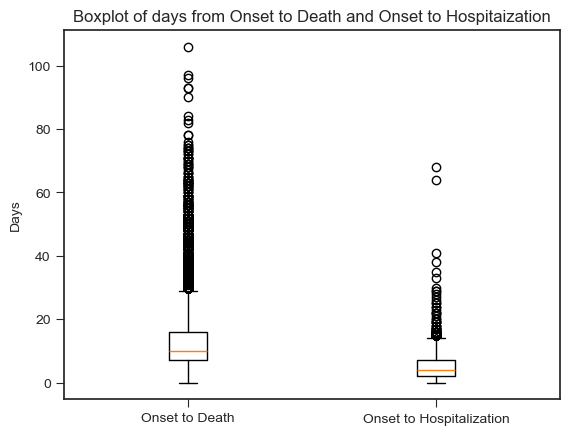

In [675]:
plt.boxplot(confirmed_cases[['OnsetToDeath','OnsetToHospital']])
plt.xticks([1, 2], ['Onset to Death', 'Onset to Hospitalization'])  # Set custom labels for the y-axis
plt.ylabel('Days')
plt.title('Boxplot of days from Onset to Death and Onset to Hospitaization')
plt.show()

In [676]:
# Calculate the 99th percentile for OnsetToDeath and OnsetToHospital
onset_to_death_99 = confirmed_cases['OnsetToDeath'].quantile(0.99)
onset_to_hospital_99 = confirmed_cases['OnsetToHospital'].quantile(0.99)

# Print the results with descriptive text
print(f"99th percentile of Onset to Death: {onset_to_death_99} days")
print(f"99th percentile of Onset to Hospital: {onset_to_hospital_99} days")

99th percentile of Onset to Death: 39.0 days
99th percentile of Onset to Hospital: 14.0 days


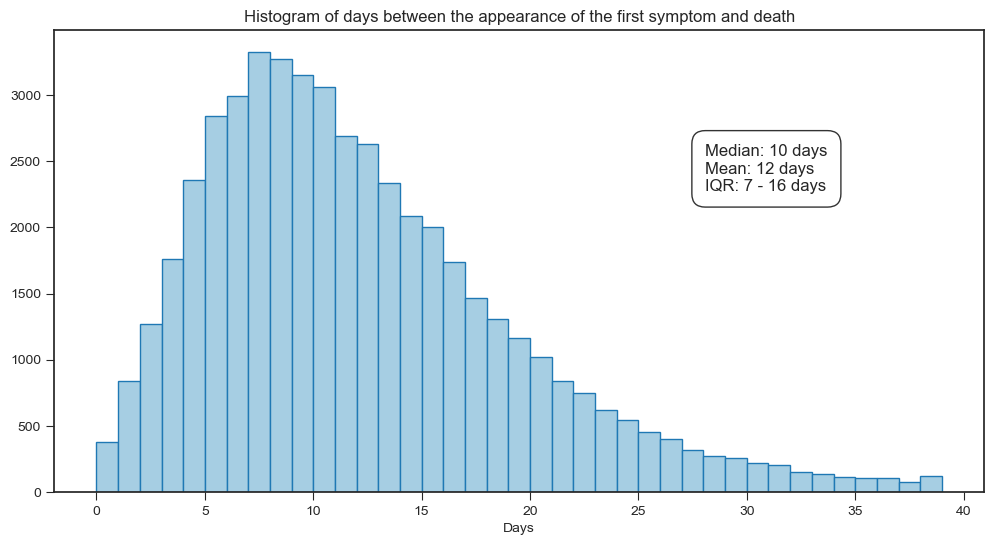

In [677]:
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette()

OTD = confirmed_cases[confirmed_cases['OnsetToDeath'] <= confirmed_cases['OnsetToDeath'].quantile(0.99)]['OnsetToDeath'].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.hist(OTD, bins=39, color=sns.color_palette('Paired')[0], edgecolor = sns.color_palette('Paired')[1]) # Set color to pastel blue

plt.xlabel('Days')
plt.title('Histogram of days between the appearance of the first symptom and death')

# Important statistics
q25 = confirmed_cases['OnsetToDeath'].quantile(0.25)
q75 = confirmed_cases['OnsetToDeath'].quantile(0.75)
median_value = confirmed_cases['OnsetToDeath'].median()
mean_value = round(confirmed_cases['OnsetToDeath'].mean(),1)

# Add important statistics
textstr = (
    f"Median: {median_value:.0f} days\n"
    f"Mean: {mean_value:.0f} days\n"
    f"IQR: {q25:.0f} - {q75:.0f} days"
)

# Adding the text box with information to the plot
plt.gca().text(
    0.7, 0.7, textstr, transform=plt.gca().transAxes,
    fontsize=12, verticalalignment='center', horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor= 'black', alpha=0.8, boxstyle='round,pad=0.8')  # Adjust padding
)

plt.show()

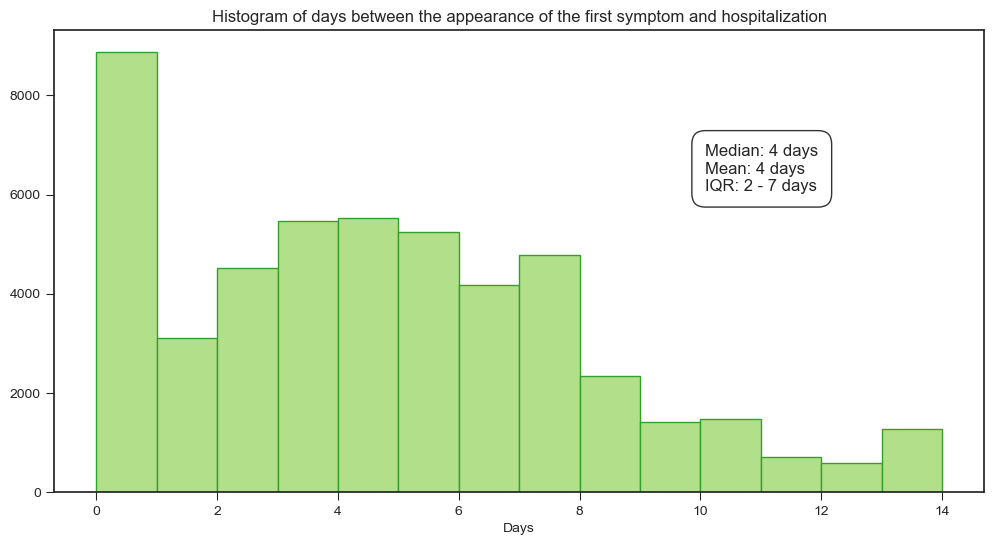

In [678]:
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette()

OTH = confirmed_cases[confirmed_cases['OnsetToHospital'] <= confirmed_cases['OnsetToHospital'].quantile(0.99)]['OnsetToHospital'].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.hist(OTH, bins=14, color=sns.color_palette('Paired')[2], edgecolor = sns.color_palette('Paired')[3]) # Set color to pastel blue

plt.xlabel('Days')
plt.title('Histogram of days between the appearance of the first symptom and hospitalization')

# Important statistics
q25 = confirmed_cases['OnsetToHospital'].quantile(0.25)
q75 = confirmed_cases['OnsetToHospital'].quantile(0.75)
median_value = confirmed_cases['OnsetToHospital'].median()
mean_value = round(confirmed_cases['OnsetToHospital'].mean(),1)

# Add important statistics
textstr = (
    f"Median: {median_value:.0f} days\n"
    f"Mean: {mean_value:.0f} days\n"
    f"IQR: {q25:.0f} - {q75:.0f} days"
)

# Adding the text box with information to the plot
plt.gca().text(
    0.7, 0.7, textstr, transform=plt.gca().transAxes,
    fontsize=12, verticalalignment='center', horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor= 'black', alpha=0.8, boxstyle='round,pad=0.8')  # Adjust padding
)
plt.show()

In [679]:
# Group confirmed cases by date and state
confirmed_cases_by_state = confirmed_cases.groupby(['FECHA_SINTOMAS', 'ENTIDAD_RES']).size().reset_index(name='confirmed_cases')
confirmed_deaths_by_state = confirmed_cases.groupby(['FECHA_DEF', 'ENTIDAD_RES']).size().reset_index(name='confirmed_deaths')

confirmed_cases_by_state.rename(columns={'FECHA_SINTOMAS':'FECHA'}, inplace=True)
confirmed_deaths_by_state.rename(columns={'FECHA_DEF':'FECHA'}, inplace=True)

state_time_series= pd.merge(confirmed_cases_by_state, confirmed_deaths_by_state, how='outer', on=['FECHA', 'ENTIDAD_RES']).fillna(0)
state_time_series.rename(columns={'FECHA': 'date', 'ENTIDAD_RES': 'state'}, inplace=True)

state_time_series.head()

,date,state,confirmed_cases,confirmed_deaths
0,2020-02-26,15,1.0,0.0
1,2020-02-27,9,1.0,0.0
2,2020-03-01,25,1.0,0.0
3,2020-03-02,15,1.0,0.0
4,2020-03-03,9,1.0,0.0


In [680]:
print(state_time_series[state_time_series['date'] == datetime(2020,2,26)])

print(state_time_series[state_time_series['date'] == datetime(2020,5,26)])


        date  state  confirmed_cases  confirmed_deaths
0 2020-02-26     15              1.0               0.0
           date  state  confirmed_cases  confirmed_deaths
1835 2020-05-26      1              6.0               1.0
1836 2020-05-26      2             29.0              30.0
1837 2020-05-26      3              2.0               1.0
1838 2020-05-26      4              2.0               3.0
1839 2020-05-26      5              4.0               3.0
1840 2020-05-26      6              0.0               2.0
1841 2020-05-26      7             17.0               4.0
1842 2020-05-26      8              4.0              15.0
1843 2020-05-26      9             99.0             109.0
1844 2020-05-26     10              4.0               3.0
1845 2020-05-26     11              7.0               3.0
1846 2020-05-26     12             30.0              22.0
1847 2020-05-26     13              4.0              13.0
1848 2020-05-26     14             13.0               5.0
1849 2020-05-26     

In [681]:
# Create a list of all unique dates in your data
all_dates = pd.date_range(start=state_time_series['date'].min(), 
                          end=state_time_series['date'].max(), 
                          freq='D')

all_states = sorted(state_time_series['state'].unique())

print(all_dates)

print(all_states)

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-01'],
              dtype='datetime64[ns]', length=158, freq='D')
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32)]


In [682]:
complete_template = pd.DataFrame(list(product(all_dates, all_states)), columns=['date', 'state'])

state_data = pd.merge(complete_template, state_time_series, on=['date', 'state'], how='left')

state_data['confirmed_cases'] = state_data['confirmed_cases'].fillna(0)
state_data['confirmed_deaths'] = state_data['confirmed_deaths'].fillna(0)

state_data.head()


,date,state,confirmed_cases,confirmed_deaths
0,2020-02-26,1,0.0,0.0
1,2020-02-26,2,0.0,0.0
2,2020-02-26,3,0.0,0.0
3,2020-02-26,4,0.0,0.0
4,2020-02-26,5,0.0,0.0


In [683]:
national_data = state_data.groupby('date').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()


national_data.tail(7)

,date,confirmed_cases,confirmed_deaths
151,2020-07-26,46.0,477.0
152,2020-07-27,28.0,383.0
153,2020-07-28,10.0,401.0
154,2020-07-29,11.0,374.0
155,2020-07-30,2.0,379.0
156,2020-07-31,0.0,127.0
157,2020-08-01,0.0,4.0


In [684]:
#Download the shapefile of mexico's states from INEGI https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=794551067314
mexico_gdf = gpd.read_file('/Users/ro/Downloads/mg_2023_integrado/conjunto_de_datos/00ent.shp')
mexico_gdf['CVE_ENT'] = mexico_gdf['CVE_ENT'].astype(int)

mexico_gdf.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,1,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
1,02,2,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,03,3,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,4,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,5,Coahuila de Zaragoza,"POLYGON ((2469501.165 1978862.429, 2469539.651..."


<Axes: >

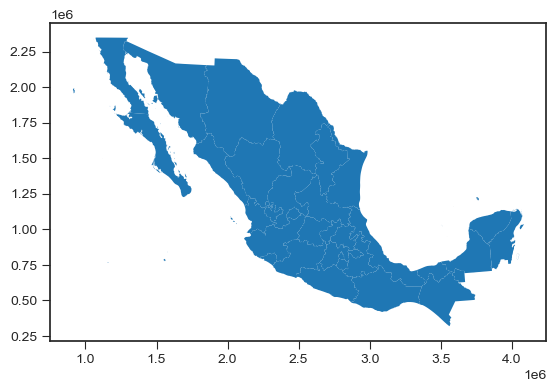

In [685]:
plt.style.use('seaborn-v0_8-ticks')
mexico_gdf.plot()

In [686]:
gdf_state_data = pd.merge(
    state_data,                   # Spatial data with all states
    mexico_gdf[['CVE_ENT','NOMGEO','geometry']],            # COVID-19 data with confirmed cases and deaths
    left_on='state',     # Merge on state code in gdf
    right_on='CVE_ENT',      # Merge on state code in state_data
    how='left'             # Use left join to retain all spatial data
)

gdf_state_data.drop('CVE_ENT', axis=1, inplace=True)
gdf_state_data.rename(columns={'NOMGEO' : 'state_name'}, inplace=True)

gdf_state_data.head()


,date,state,confirmed_cases,confirmed_deaths,state_name,geometry
0,2020-02-26,1,0.0,0.0,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
1,2020-02-26,2,0.0,0.0,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,2020-02-26,3,0.0,0.0,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,2020-02-26,4,0.0,0.0,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,2020-02-26,5,0.0,0.0,Coahuila de Zaragoza,"POLYGON ((2469501.165 1978862.429, 2469539.651..."


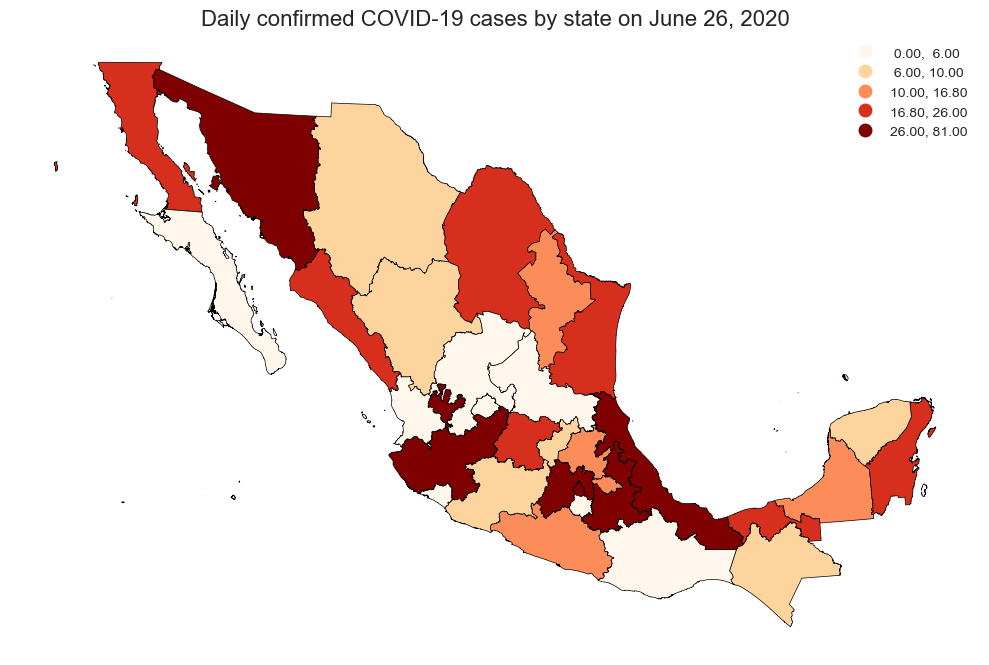

In [687]:
specific_day = datetime(2020,6,26)
filtered_date = gdf_state_data[gdf_state_data['date'] == specific_day]

if not isinstance(filtered_date, gpd.GeoDataFrame):
    filtered_date = gpd.GeoDataFrame(filtered_date, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 10))

plot = filtered_date.plot(
    column='confirmed_cases',  
    cmap='OrRd',          
    ax=ax,                   
    edgecolor='black',       
    linewidth=0.5,           
    legend=True,
    legend_kwds={
        'loc': 'upper right',  # Set legend location
        'fontsize': 'medium'    # Adjust text size of the legend
    },    
    scheme='quantiles',
    k=5      
)

plt.title(f'Daily confirmed COVID-19 cases by state on {specific_day.strftime("%B %d, %Y")}', fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

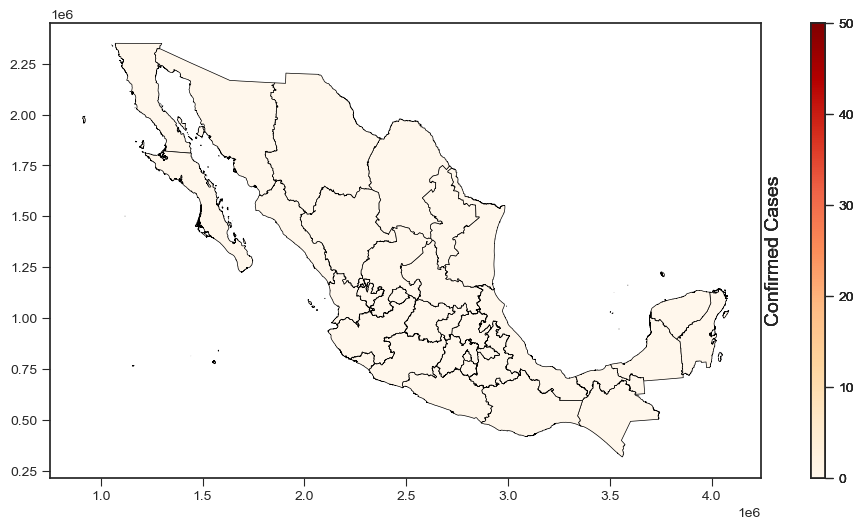

In [688]:
from matplotlib.animation import FuncAnimation

# Set the color scale limits based on all confirmed cases data to keep it constant
vmin = gdf_state_data['confirmed_cases'].min()
vmax = gdf_state_data['confirmed_cases'].max()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Define the function that updates the plot for each frame in the animation
def update(date):
    ax.clear()  # Clear previous plot before updating
    filtered_date = gdf_state_data[gdf_state_data['date'] == date]
    
    # Ensure the filtered data remains a GeoDataFrame
    if not isinstance(filtered_date, gpd.GeoDataFrame):
        filtered_date = gpd.GeoDataFrame(filtered_date, geometry='geometry')

    # Plot the filtered GeoDataFrame
    plot = filtered_date.plot(
        column='confirmed_cases',  
        cmap='OrRd',          
        ax=ax,                   
        edgecolor='black',       
        linewidth=0.5,           
        legend=False,              # Enable the legend
        vmin=vmin,                # Set the global min for color scale
        vmax=50                 # Set the global max for color scale
    )
    
    # Set the title with the current date
    ax.set_title(f'Confirmed COVID-19 Cases by State on {date.strftime("%B %d, %Y")}', fontsize=16)
    ax.set_axis_off()  # Turn off axis values for a cleaner look

    # Add a colorbar to maintain consistent scale
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.5)  # Adjust size and padding
    cbar = fig.colorbar(plot.get_children()[0], cax=cax)
    cbar.set_label('Confirmed Cases', fontsize=14, rotation=90, labelpad=20)
    cbar.ax.yaxis.set_label_position('left')
    cbar.ax.yaxis.set_ticks_position('right')

# Create the animation object
anim = FuncAnimation(fig, update, frames=all_dates, repeat=False)

# Display the animation in Jupyter Notebook (if using)
from IPython.display import HTML
HTML(anim.to_jshtml())

# Save the animation as a GIF or MP4 if desired
anim.save('confirmed_cases_animation.gif', writer='imagemagick', fps=5)  # Requires imagemagick
# For MP4: anim.save('confirmed_cases_animation.mp4', writer='ffmpeg', fps=2)


In [ ]:
state_data_weekly = state_data.groupby(['state', pd.Grouper(key='date', freq='W-SUN')]).agg({'confirmed_cases': 'sum', 'confirmed_deaths': 'sum'}).reset_index()
print(state_data_weekly.head())


national_data_weekly = national_data.groupby(pd.Grouper(key='date', freq='W-SUN')).agg({'confirmed_cases': 'sum', 'confirmed_deaths': 'sum'}).reset_index()
print(national_data_weekly.head())

   state       date  confirmed_cases  confirmed_deaths
0      1 2020-03-01              0.0               0.0
1      1 2020-03-08              0.0               0.0
2      1 2020-03-15              0.0               0.0
3      1 2020-03-22              0.0               0.0
4      1 2020-03-29              1.0               0.0
        date  confirmed_cases  confirmed_deaths
0 2020-03-01              3.0               0.0
1 2020-03-08              8.0               0.0
2 2020-03-15             26.0               0.0
3 2020-03-22            136.0               4.0
4 2020-03-29            330.0              42.0


In [ ]:
gdf_state_data_weekly = pd.merge(
    state_data_weekly,
    mexico_gdf[['CVE_ENT','NOMGEO','geometry']],
    left_on='state', 
    right_on='CVE_ENT', 
    how='left')
gdf_state_data_weekly

gdf_state_data_weekly.drop('CVE_ENT', axis=1, inplace=True)
gdf_state_data_weekly.rename(columns={'NOMGEO' : 'state_name'}, inplace=True)

gdf_state_data_weekly = gpd.GeoDataFrame(gdf_state_data_weekly, geometry='geometry')

gdf_state_data_weekly

,state,date,confirmed_cases,confirmed_deaths,state_name,geometry
0,1,2020-03-01,0.0,0.0,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
1,1,2020-03-08,0.0,0.0,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
2,1,2020-03-15,0.0,0.0,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
3,1,2020-03-22,0.0,0.0,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
4,1,2020-03-29,1.0,0.0,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
...,...,...,...,...,...,...
731,32,2020-07-05,39.0,22.0,Zacatecas,"POLYGON ((2470352.986 1453426.983, 2473254.843..."
732,32,2020-07-12,36.0,32.0,Zacatecas,"POLYGON ((2470352.986 1453426.983, 2473254.843..."
733,32,2020-07-19,28.0,33.0,Zacatecas,"POLYGON ((2470352.986 1453426.983, 2473254.843..."
734,32,2020-07-26,13.0,45.0,Zacatecas,"POLYGON ((2470352.986 1453426.983, 2473254.843..."


MovieWriter imagemagick unavailable; using Pillow instead.


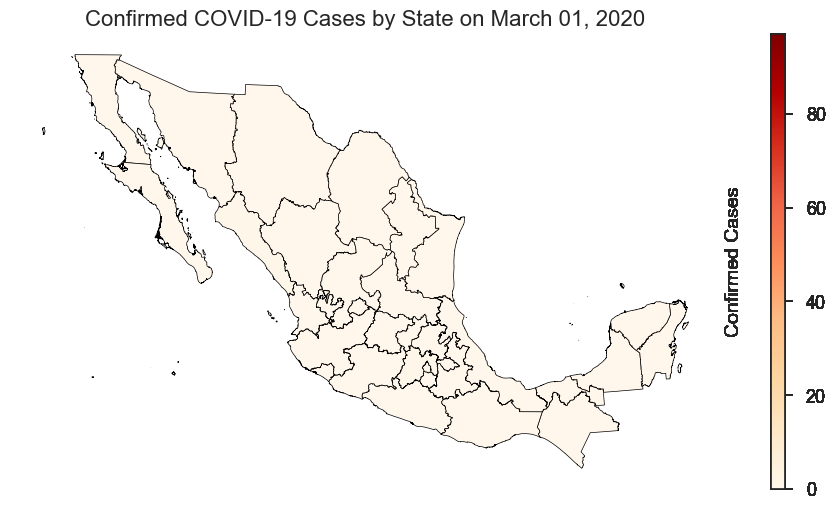

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

all_weeks = pd.date_range(start=gdf_state_data_weekly['date'].min(), 
                          end=gdf_state_data_weekly['date'].max(), 
                          freq='W')

all_states = sorted(state_time_series['state'].unique())
# Define the function that updates the plot for each frame in the animation
def update_weekly(date):
    ax.clear()  # Clear previous plot before updating
    filtered_date = gdf_state_data_weekly[gdf_state_data_weekly['date'] == date]
    
    # Plot the filtered GeoDataFrame
    plot = filtered_date.plot(
        column='confirmed_cases',  
        cmap='OrRd',          
        ax=ax,                   
        edgecolor='black',       
        linewidth=0.5,           
        legend=False,              # Enable the legend
        vmin=0,                # Set the global min for color scale
        vmax=gdf_state_data_weekly['confirmed_cases'].quantile(0.80)                 # Set the global max for color scale
    )
    
    # Set the title with the current date
    ax.set_title(f'Confirmed COVID-19 Cases by State on {date.strftime("%B %d, %Y")}', fontsize=16)
    ax.set_axis_off()  # Turn off axis values for a cleaner look

    # Add a colorbar to maintain consistent scale
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.5)  # Adjust size and padding
    cbar = fig.colorbar(plot.get_children()[0], cax=cax)
    cbar.set_label('Confirmed Cases', fontsize=14, rotation=90, labelpad=20)
    cbar.ax.yaxis.set_label_position('left')
    cbar.ax.yaxis.set_ticks_position('right')

# Create the animation object
anim = FuncAnimation(fig, update_weekly, frames=all_weeks, repeat=False)

# Display the animation in Jupyter Notebook (if using)
from IPython.display import HTML
HTML(anim.to_jshtml())

# Save the animation as a GIF or MP4 if desired
anim.save('weekly_confirmed_cases_animation.gif', writer='imagemagick', fps=5)  # Requires imagemagick
# For MP4: anim.save('confirmed_cases_animation.mp4', writer='ffmpeg', fps=2)

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_47984/3931982864.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_2_states))  # Use 'tab10' to get distinct colors for top states


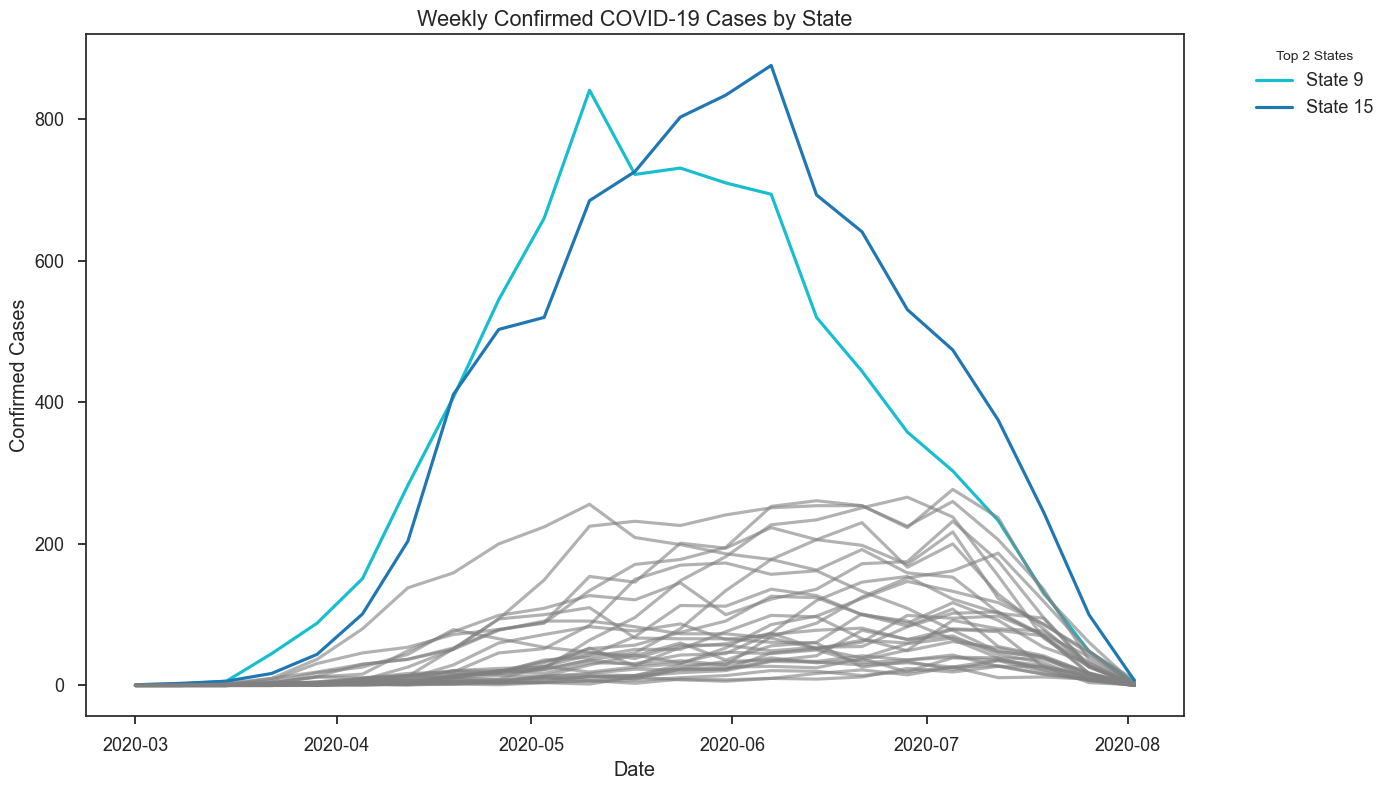

In [ ]:
# Calculate total confirmed cases for each state
total_cases_by_state = state_data_weekly.groupby('state')['confirmed_cases'].sum()

# Find the top 2 states with the highest total confirmed cases
top_2_states = total_cases_by_state.nlargest(2).index

# Create a list of unique states
unique_states = state_data_weekly['state'].unique()

# Set up the figure and axis
plt.figure(figsize=(14, 8))

# Define a colormap for the top 2 states
colors = plt.cm.get_cmap('tab10', len(top_2_states))  # Use 'tab10' to get distinct colors for top states

# Plot data for each state
for i, state in enumerate(unique_states):
    state_data = state_data_weekly[state_data_weekly['state'] == state]

    if state in top_2_states:
        # Plot top 2 states with unique colors
        plt.plot(
            state_data['date'],
            state_data['confirmed_cases'],
            label=f'State {state}',  # Label for legend
            color=colors(top_2_states.tolist().index(state))  # Assign unique color to top 2 states
        )
    else:
        # Plot other states in grey without labels
        plt.plot(
            state_data['date'],
            state_data['confirmed_cases'],
            color='grey',
            alpha=0.6  # Slight transparency for less prominent lines
        )

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Weekly Confirmed COVID-19 Cases by State')

# Display the legend for only the top 2 states
plt.legend(title='Top 2 States', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## EDA for 2024 COVID-19 Mexico Data

Source: 
* https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia

In [ ]:
#Read downloaded databases split by years
DB_names = ['COVID19MEXICO-7.csv','230425COVID19MEXICO.csv','COVID19MEXICO2021.csv','COVID19MEXICO2020.csv']

data_2020 = pd.read_csv('/Users/ro/Downloads/COVID19MEXICO2020.csv', encoding='latin1')
data_2021 = pd.read_csv('/Users/ro/Downloads/COVID19MEXICO2021.csv', encoding='latin1')
data_2022 = pd.read_csv('/Users/ro/Downloads/230425COVID19MEXICO.csv', encoding='latin1')
data_2023 = pd.read_csv('/Users/ro/Downloads/COVID19MEXICO-7.csv', encoding='latin1')

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_68005/102681277.py:4: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv('/Users/ro/Downloads/COVID19MEXICO2020.csv', encoding='latin1')
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_68005/102681277.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('/Users/ro/Downloads/COVID19MEXICO2021.csv', encoding='latin1')
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_68005/102681277.py:6: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv('/Users/ro/Downloads/230425COVID19MEXICO.csv', encoding='latin1')
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_68005/102681277.py:7: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
# Remove duplicate date entries between 2022 and 2023 databases
remove_dates = data_2022['FECHA_SINTOMAS'] >= '2023-01-01'
data_2022.drop(data_2022[remove_dates].index, inplace=True)

In [ ]:
# Convert to date-time format 
data_2020['FECHA_ACTUALIZACION'] = pd.to_datetime(data_2020['FECHA_ACTUALIZACION']).dt.date
data_2020['FECHA_INGRESO'] = pd.to_datetime(data_2020['FECHA_INGRESO']).dt.date
data_2020['FECHA_SINTOMAS'] = pd.to_datetime(data_2020['FECHA_SINTOMAS']).dt.date
data_2020['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data_2020['FECHA_DEF'] = pd.to_datetime(data_2020['FECHA_DEF']).dt.date

data_2021['FECHA_ACTUALIZACION'] = pd.to_datetime(data_2021['FECHA_ACTUALIZACION']).dt.date
data_2021['FECHA_INGRESO'] = pd.to_datetime(data_2021['FECHA_INGRESO']).dt.date
data_2021['FECHA_SINTOMAS'] = pd.to_datetime(data_2021['FECHA_SINTOMAS']).dt.date
data_2021['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data_2021['FECHA_DEF'] = pd.to_datetime(data_2021['FECHA_DEF']).dt.date

data_2022['FECHA_ACTUALIZACION'] = pd.to_datetime(data_2022['FECHA_ACTUALIZACION']).dt.date
data_2022['FECHA_INGRESO'] = pd.to_datetime(data_2022['FECHA_INGRESO']).dt.date
data_2022['FECHA_SINTOMAS'] = pd.to_datetime(data_2022['FECHA_SINTOMAS']).dt.date
data_2022['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data_2022['FECHA_DEF'] = pd.to_datetime(data_2022['FECHA_DEF']).dt.date

data_2023['FECHA_ACTUALIZACION'] = pd.to_datetime(data_2023['FECHA_ACTUALIZACION']).dt.date
data_2023['FECHA_INGRESO'] = pd.to_datetime(data_2023['FECHA_INGRESO']).dt.date
data_2023['FECHA_SINTOMAS'] = pd.to_datetime(data_2023['FECHA_SINTOMAS']).dt.date
data_2023['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data_2023['FECHA_DEF'] = pd.to_datetime(data_2023['FECHA_DEF']).dt.date


In [ ]:
#Filter confirmed cases only
filter_2020 = data_2020['CLASIFICACION_FINAL'].isin([1,2,3])
filter_2021 = data_2021['CLASIFICACION_FINAL'].isin([1,2,3])
filter_2022 = data_2022['CLASIFICACION_FINAL'].isin([1,2,3])
filter_2023 = data_2023['CLASIFICACION_FINAL'].isin([1,2,3])

confirmed_2020 = data_2020.loc[filter_2020].reset_index(drop=True).copy()
confirmed_2021 = data_2021.loc[filter_2021].reset_index(drop=True).copy()
confirmed_2022 = data_2022.loc[filter_2022].reset_index(drop=True).copy()
confirmed_2023 = data_2023.loc[filter_2023].reset_index(drop=True).copy()

In [ ]:
#Add onset to death column
OTD2020 = (confirmed_2020['FECHA_DEF']-confirmed_2020['FECHA_SINTOMAS']).dt.days 
OTD2021 = (confirmed_2021['FECHA_DEF']-confirmed_2021['FECHA_SINTOMAS']).dt.days 
OTD2022 = (confirmed_2022['FECHA_DEF']-confirmed_2022['FECHA_SINTOMAS']).dt.days 
OTD2023 = (confirmed_2023['FECHA_DEF']-confirmed_2023['FECHA_SINTOMAS']).dt.days 

confirmed_2020.loc[:, 'OTD'] = OTD2020
confirmed_2021.loc[:, 'OTD'] = OTD2021
confirmed_2022.loc[:, 'OTD'] = OTD2022
confirmed_2023.loc[:, 'OTD'] = OTD2023

# Determine if there are any bad quality death data
print('Death Date before Symptoms Date in 2020: ', (OTD2020 < 0).sum())
print('Death Date before Symptoms Date in 2021: ', (OTD2021 < 0).sum())
print('Death Date before Symptoms Date in 2022: ', (OTD2022 < 0).sum())
print('Death Date before Symptoms Date in 2023: ', (OTD2023 < 0).sum())

Death Date before Symptoms Date in 2020:  9
Death Date before Symptoms Date in 2021:  0
Death Date before Symptoms Date in 2022:  1
Death Date before Symptoms Date in 2023:  0


In [ ]:
#Remove wrong data entries i.e. Death Date < Symptoms Date
confirmed_2020 = confirmed_2020[(confirmed_2020['OTD'].isnull()) | (confirmed_2020['OTD'] >= 0)].reset_index(drop=True)
confirmed_2021 = confirmed_2021[(confirmed_2021['OTD'].isnull()) | (confirmed_2021['OTD'] >= 0)].reset_index(drop=True)
confirmed_2022 = confirmed_2022[(confirmed_2022['OTD'].isnull()) | (confirmed_2022['OTD'] >= 0)].reset_index(drop=True)
confirmed_2023 = confirmed_2023[(confirmed_2023['OTD'].isnull()) | (confirmed_2023['OTD'] >= 0)].reset_index(drop=True)

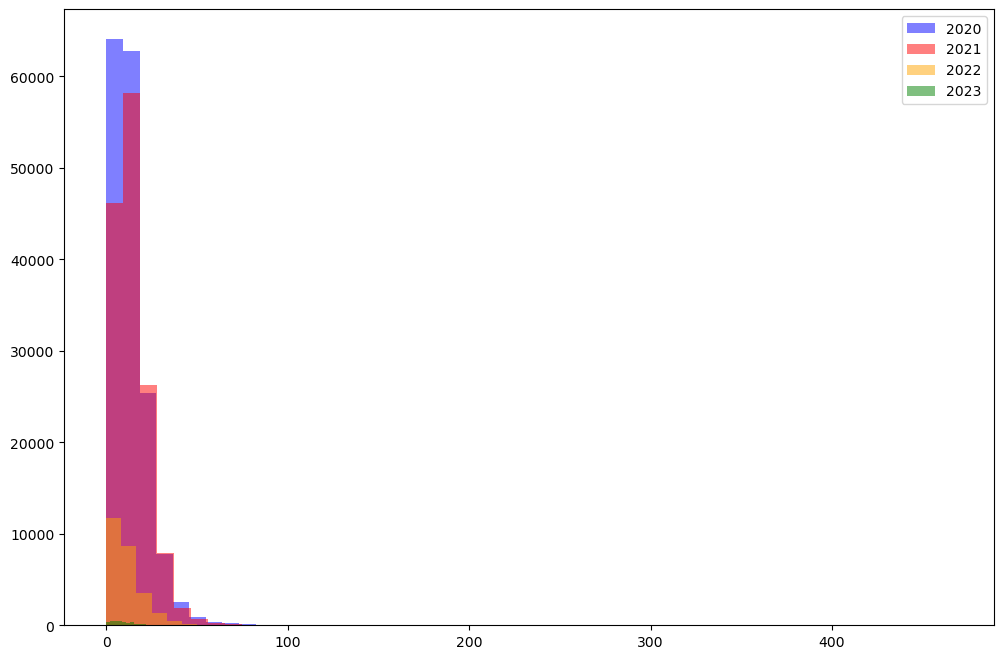

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(confirmed_2020[confirmed_2020['OTD'] >= 0]['OTD'], color='blue', alpha=0.5, label='2020', bins = 50)
plt.hist(confirmed_2021[confirmed_2021['OTD'] >= 0]['OTD'], color='red', alpha=0.5, label='2021', bins = 50)
plt.hist(confirmed_2022[confirmed_2022['OTD'] >= 0]['OTD'], color='orange', alpha=0.5, label='2022', bins = 50)
plt.hist(confirmed_2023[confirmed_2023['OTD'] >= 0]['OTD'], color='green', alpha=0.5, label='2023', bins = 50)
plt.legend()
plt.show()

In [ ]:
percentile_99_2020 = confirmed_2020[confirmed_2020['OTD'] >= 0]['OTD'].quantile(0.99)
percentile_99_2021 = confirmed_2021[confirmed_2021['OTD'] >= 0]['OTD'].quantile(0.99)
percentile_99_2022 = confirmed_2022[confirmed_2022['OTD'] >= 0]['OTD'].quantile(0.99)
percentile_99_2023 = confirmed_2023[confirmed_2023['OTD'] >= 0]['OTD'].quantile(0.99)

print("99% of 2020 deaths remains below:", percentile_99_2020)
print("99% of 2021 deaths remains below:", percentile_99_2021)
print("99% of 2022 deaths remains below:", percentile_99_2022)
print("99% of 2023 deaths remains below:", percentile_99_2023)

99% of 2020 deaths remains below: 47.0
99% of 2021 deaths remains below: 45.0
99% of 2022 deaths remains below: 44.0
99% of 2023 deaths remains below: 42.0


In [ ]:
#Remove rows which took longer than 50 days for OTD
confirmed_2020 = confirmed_2020[(confirmed_2020['OTD'].isnull()) | (confirmed_2020['OTD'] <= 50)].reset_index(drop=True)
confirmed_2021 = confirmed_2021[(confirmed_2021['OTD'].isnull()) | (confirmed_2021['OTD'] <= 50)].reset_index(drop=True)
confirmed_2022 = confirmed_2022[(confirmed_2022['OTD'].isnull()) | (confirmed_2022['OTD'] <= 50)].reset_index(drop=True)
confirmed_2023 = confirmed_2023[(confirmed_2023['OTD'].isnull()) | (confirmed_2023['OTD'] <= 50)].reset_index(drop=True)

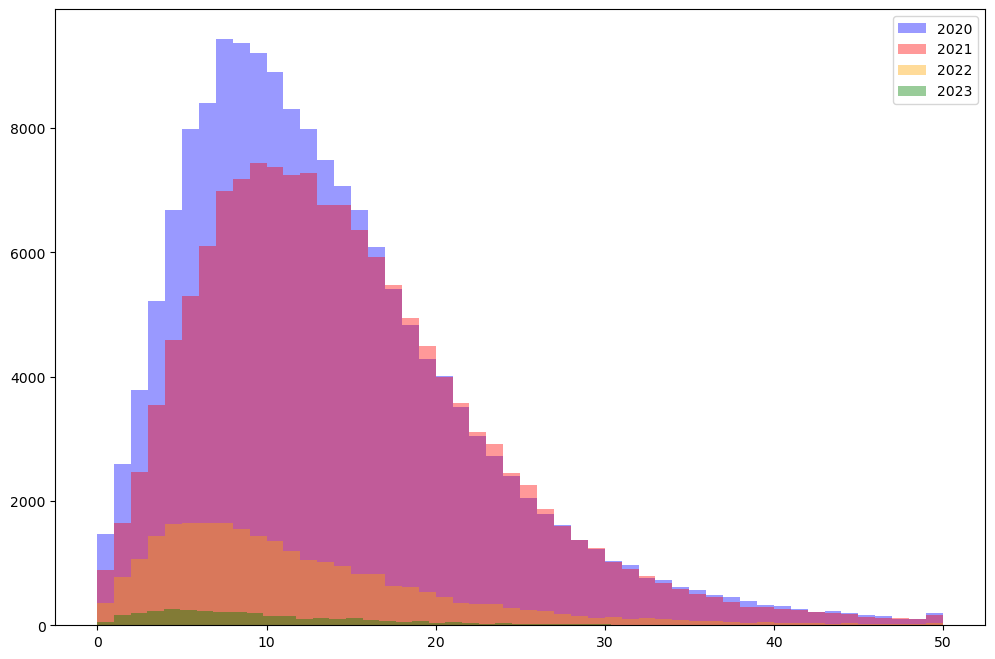

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(confirmed_2020[confirmed_2020['OTD'] >= 0]['OTD'], color='blue', alpha=0.4, label='2020', bins = 50)
plt.hist(confirmed_2021[confirmed_2021['OTD'] >= 0]['OTD'], color='red', alpha=0.4, label='2021', bins = 50)
plt.hist(confirmed_2022[confirmed_2022['OTD'] >= 0]['OTD'], color='orange', alpha=0.4, label='2022', bins = 50)
plt.hist(confirmed_2023[confirmed_2023['OTD'] >= 0]['OTD'], color='green', alpha=0.4, label='2023', bins = 50)
plt.legend()
plt.show()

In [ ]:
gender_dummies = pd.get_dummies(confirmed_2020['SEXO'], prefix='SEXO')
gender_dummies.columns = ['GENDER_F', 'GENDER_M']

confirmed_2020 = pd.concat([confirmed_2020, gender_dummies], axis =1)

In [ ]:
grouped = confirmed_2020.groupby(['ENTIDAD_RES','FECHA_SINTOMAS'])[['GENDER_F','GENDER_M']].sum()

Text(0.5, 0, 'Date')

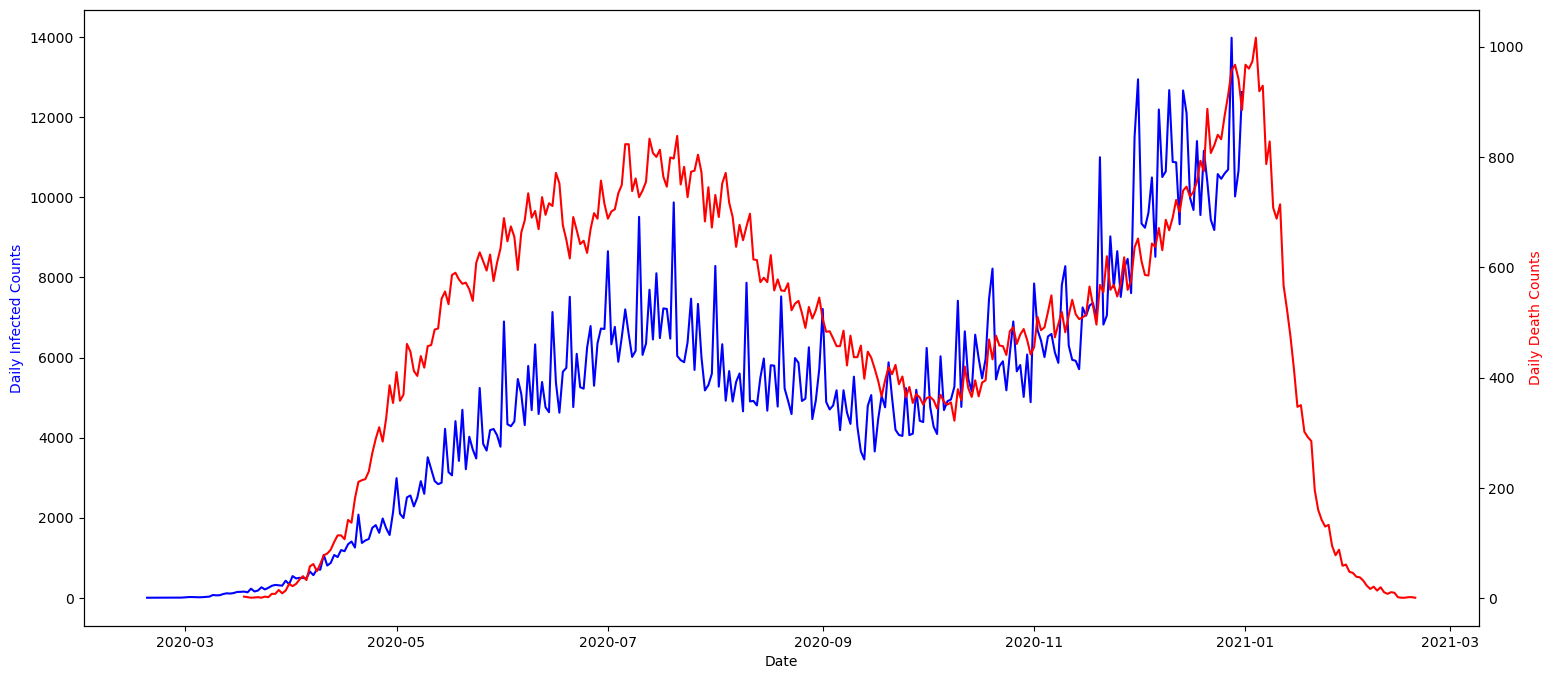

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 8))

infections_2020 = confirmed_2020.groupby('FECHA_SINTOMAS').size()
diseased_2020 = confirmed_2020.groupby('FECHA_DEF').size()
    
ax1.plot(infections_2020, color = 'blue')
ax1.set_ylabel('Daily Infected Counts', color='blue')

ax2 = ax1.twinx()
ax2.plot(diseased_2020, color='red')
ax2.set_ylabel('Daily Death Counts', color='red')

ax1.set_xlabel('Date')

In [ ]:
print("Mean of 2020 infected cases: {:.2f}".format(np.mean(infections_2020.values)))
print("Variance of 2020 infected cases: {:.2f}".format(np.var(infections_2020.values)))
print("Mean of 2020 deaths: {:.2f}".format(np.mean(diseased_2020.values)))
print("Variance of 2020 deaths: {:.2f}".format(np.var(diseased_2020.values)))

Mean of 2020 infected cases: 4974.17
Variance of 2020 infected cases: 9662727.93
Mean of 2020 deaths: 484.09
Variance of 2020 deaths: 64798.74


In [ ]:
national_2020 = pd.concat([infections_2020.to_frame(), diseased_2020.to_frame()], axis=1)
national_2020.columns = ['Infections','Deaths']
national_2020.index = pd.to_datetime(national_2020.index)
national.head()

,FECHA,confirmed_cases,confirmed_deaths
0,2020-01-13,1.0,0.0
1,2020-01-29,1.0,0.0
2,2020-02-06,1.0,0.0
3,2020-02-19,1.0,0.0
4,2020-02-21,1.0,0.0


In [ ]:
infections_2021= confirmed_2021.groupby('FECHA_SINTOMAS').size()
diseased_2021 = confirmed_2021.groupby('FECHA_DEF').size()

infections_2022 = confirmed_2022.groupby('FECHA_SINTOMAS').size()
diseased_2022 = confirmed_2022.groupby('FECHA_DEF').size()

infections_2023 = confirmed_2023.groupby('FECHA_SINTOMAS').size()
diseased_2023 = confirmed_2023.groupby('FECHA_DEF').size()

In [ ]:
national_2021 = pd.concat([infections_2021.to_frame(), diseased_2021.to_frame()], axis=1)
national_2021.columns = ['Infections','Deaths']
national_2021.index = pd.to_datetime(national_2021.index)

national_2022 = pd.concat([infections_2022.to_frame(), diseased_2022.to_frame()], axis=1)
national_2022.columns = ['Infections','Deaths']
national_2022.index = pd.to_datetime(national_2022.index)

national_2023 = pd.concat([infections_2023.to_frame(), diseased_2023.to_frame()], axis=1)
national_2023.columns = ['Infections','Deaths']
national_2023.index = pd.to_datetime(national_2023.index)

In [ ]:
print(national_2020[-55:-40])
print(national_2021[:15])

            Infections  Deaths
2020-12-27     10695.0   912.0
2020-12-28     13987.0   957.0
2020-12-29     10023.0   967.0
2020-12-30     10668.0   941.0
2020-12-31     12630.0   885.0
2021-01-01         NaN   967.0
2021-01-02         NaN   960.0
2021-01-03         NaN   973.0
2021-01-04         NaN  1016.0
2021-01-05         NaN   919.0
2021-01-06         NaN   929.0
2021-01-07         NaN   787.0
2021-01-08         NaN   828.0
2021-01-09         NaN   708.0
2021-01-10         NaN   688.0
            Infections  Deaths
2021-01-01     17435.0      13
2021-01-02     13746.0      30
2021-01-03     14197.0      56
2021-01-04     18691.0      93
2021-01-05     16718.0     146
2021-01-06     14620.0     228
2021-01-07     14596.0     274
2021-01-08     15820.0     365
2021-01-09     14574.0     431
2021-01-10     17194.0     519
2021-01-11     17408.0     597
2021-01-12     14773.0     665
2021-01-13     14140.0     721
2021-01-14     14169.0     793
2021-01-15     16624.0     897


In [ ]:
print(national_2021[-55:-40])
print(national_2022[:15])

            Infections  Deaths
2021-12-24      5432.0     120
2021-12-25      6490.0     108
2021-12-26      8912.0     118
2021-12-27     11717.0     117
2021-12-28     11666.0     116
2021-12-29     10520.0     102
2021-12-30     11361.0      94
2021-12-31     15222.0     107
2022-01-01         NaN     108
2022-01-02         NaN     106
2022-01-03         NaN     132
2022-01-04         NaN     119
2022-01-05         NaN     107
2022-01-06         NaN     103
2022-01-07         NaN      88
            Infections  Deaths
2022-01-01     27334.0     1.0
2022-01-02     28052.0     1.0
2022-01-03     42466.0    13.0
2022-01-04     37387.0    16.0
2022-01-05     40611.0    30.0
2022-01-06     40218.0    35.0
2022-01-07     47224.0    46.0
2022-01-08     49931.0    66.0
2022-01-09     54638.0    87.0
2022-01-10     80699.0    96.0
2022-01-11     61828.0   116.0
2022-01-12     59842.0   155.0
2022-01-13     54732.0   155.0
2022-01-14     56530.0   184.0
2022-01-15     58561.0   187.0


In [ ]:
print(national_2022[-55:-40])
print(national_2023[:15])

            Infections  Deaths
2022-12-14      3965.0    13.0
2022-12-15      3635.0    21.0
2022-12-16      3382.0    23.0
2022-12-17      3896.0    21.0
2022-12-18      5151.0    20.0
2022-12-19      6599.0    22.0
2022-12-20      6151.0    24.0
2022-12-21      4859.0    19.0
2022-12-22      3604.0    28.0
2022-12-23      3204.0    24.0
2022-12-24      3569.0    21.0
2022-12-25      4663.0    29.0
2022-12-26      6349.0    30.0
2022-12-27      5418.0    38.0
2022-12-28      4494.0    25.0
            Infections  Deaths
2023-01-01        5610     1.0
2023-01-02        6379     NaN
2023-01-03        5523     6.0
2023-01-04        4350    10.0
2023-01-05        3640    16.0
2023-01-06        3441    18.0
2023-01-07        3989    17.0
2023-01-08        4542    20.0
2023-01-09        5812    19.0
2023-01-10        4758    25.0
2023-01-11        3406    19.0
2023-01-12        3116    41.0
2023-01-13        2902    25.0
2023-01-14        3087    22.0
2023-01-15        4019    24.0


<AxesSubplot:>

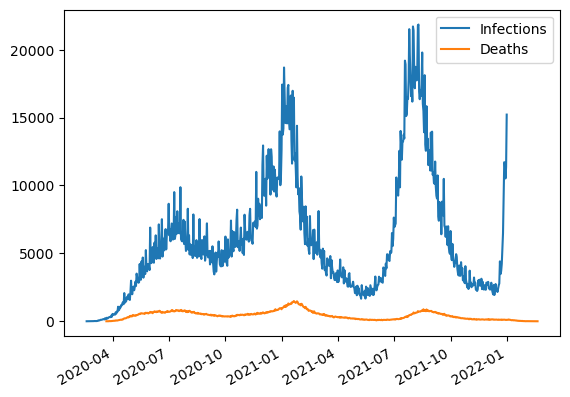

In [ ]:
#Merge 2020 with 2021 data while aggregating both database info
merged_data_2021 = national_2020.merge(national_2021, how='outer', left_index=True, right_index=True, suffixes=('_2020', '_2021'))
merged_data_2021['Infections'] = merged_data_2021['Infections_2020'].add(merged_data_2021['Infections_2021'], fill_value=0)
merged_data_2021['Deaths'] = merged_data_2021['Deaths_2020'].add(merged_data_2021['Deaths_2021'], fill_value=0)
merged_data_2021.drop(columns=['Infections_2020', 'Infections_2021', 'Deaths_2020', 'Deaths_2021'], inplace=True)
merged_data_2021.plot()

<AxesSubplot:>

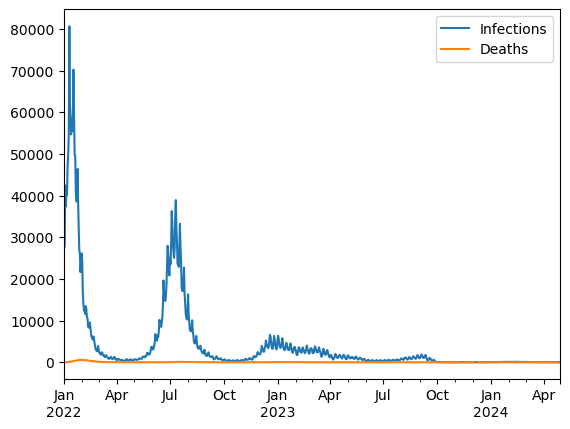

In [ ]:
#Merge 2022 with 2023 data while aggregating both database info
merged_data_2023 = national_2022.merge(national_2023, how='outer', left_index=True, right_index=True, suffixes=('_2022', '_2023'))
merged_data_2023['Infections'] = merged_data_2023['Infections_2022'].add(merged_data_2023['Infections_2023'], fill_value=0)
merged_data_2023['Deaths'] = merged_data_2023['Deaths_2022'].add(merged_data_2023['Deaths_2023'], fill_value=0)
merged_data_2023.drop(columns=['Infections_2022', 'Infections_2023', 'Deaths_2022', 'Deaths_2023'], inplace=True)
merged_data_2023.plot()

In [ ]:
#Consolidate everything within a single dataframe
national_daily = merged_data_2021.merge(merged_data_2023, how='outer', left_index=True, right_index=True, suffixes=('_2022', '_2023'))
national_daily['Infections'] = national_daily['Infections_2022'].add(national_daily['Infections_2023'], fill_value=0)
national_daily['Deaths'] = national_daily['Deaths_2022'].add(national_daily['Deaths_2023'], fill_value=0)
national_daily.drop(columns=['Infections_2022', 'Infections_2023', 'Deaths_2022', 'Deaths_2023'], inplace=True)

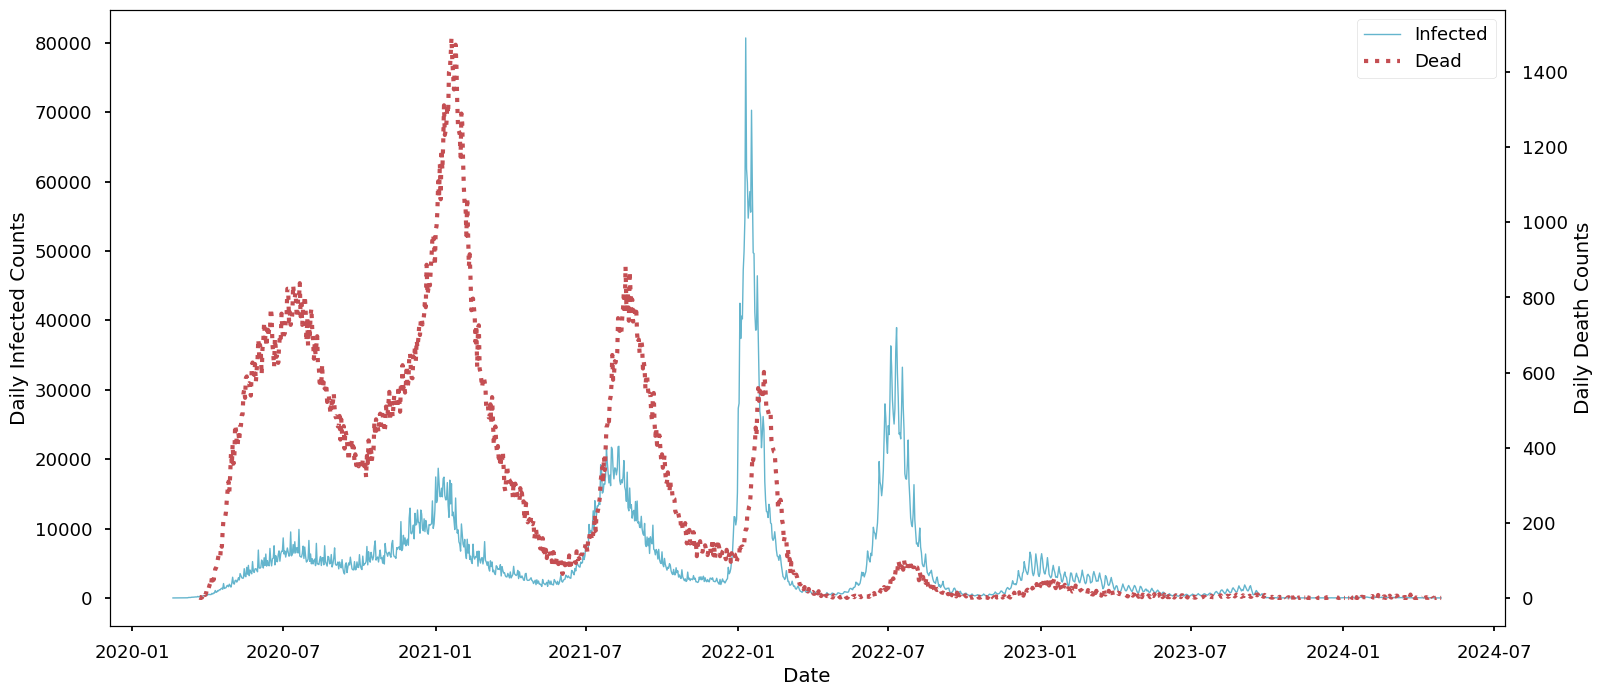

In [ ]:
plt.style.use('seaborn-talk')
colors = sns.color_palette()

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(national_daily['Infections'],label='Infected', color='#64b5cd',linewidth=1, linestyle='-')
ax1.set_ylabel('Daily Infected Counts')

ax2 = ax1.twinx()
ax2.plot(national_daily['Deaths'],label='Dead', color='#c44e52', linewidth=3, linestyle=':')
ax2.set_ylabel('Daily Death Counts')

# Getting handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combining handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Displaying legend with combined handles and labels
ax1.legend(handles, labels, loc='upper right')
ax1.set_xlabel('Date')

plt.show()

In [ ]:
print("Mean of infected cases: {:.2f}".format(np.mean(national_daily['Infections'].values)))
print("Variance of infected cases: {:.2f}".format(np.var(national_daily['Infections'].values)))
print("Mean of deaths: {:.2f}".format(np.mean(national_daily['Deaths'].fillna(0).values)))
print("Variance of deaths: {:.2f}".format(np.var(national_daily['Deaths'].fillna(0).values)))

Mean of infected cases: 5050.47
Variance of infected cases: 64553363.04
Mean of deaths: 218.03
Variance of deaths: 90138.29


<Figure size 2000x800 with 0 Axes>

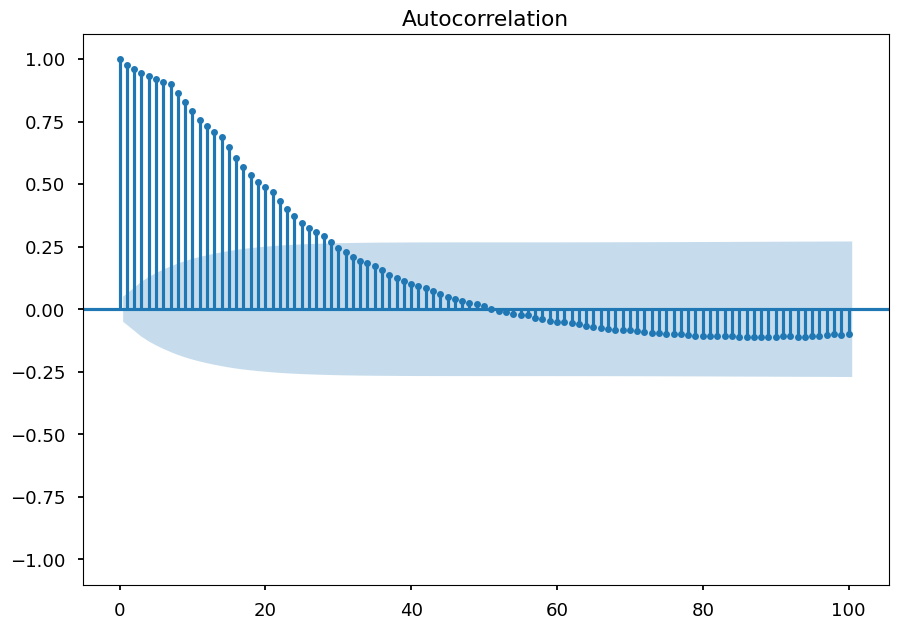

<Figure size 1800x800 with 0 Axes>

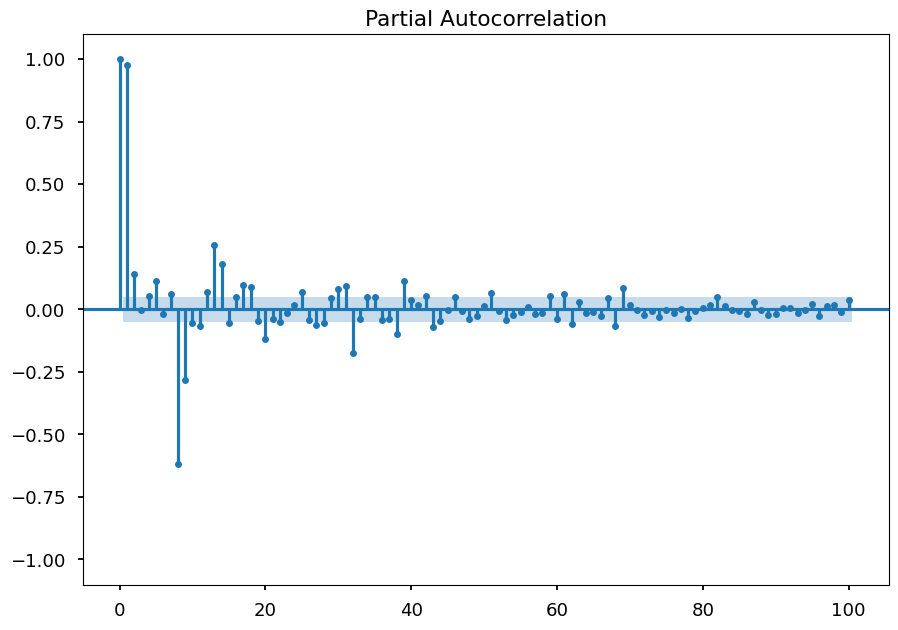

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot autocorrelation
plt.figure(figsize=(20,8))
plot_acf(national_daily['Infections'], lags=100)  # Change lags as needed
plt.ylim(-1.1,1.1)
plt.title('Autocorrelation')
plt.show()

plt.figure(figsize=(18, 8))
plot_pacf(national_daily['Infections'], lags=100, method='ywm')
plt.ylim(-1.1,1.1)
plt.title('Partial Autocorrelation')
plt.show()

<Figure size 2000x800 with 0 Axes>

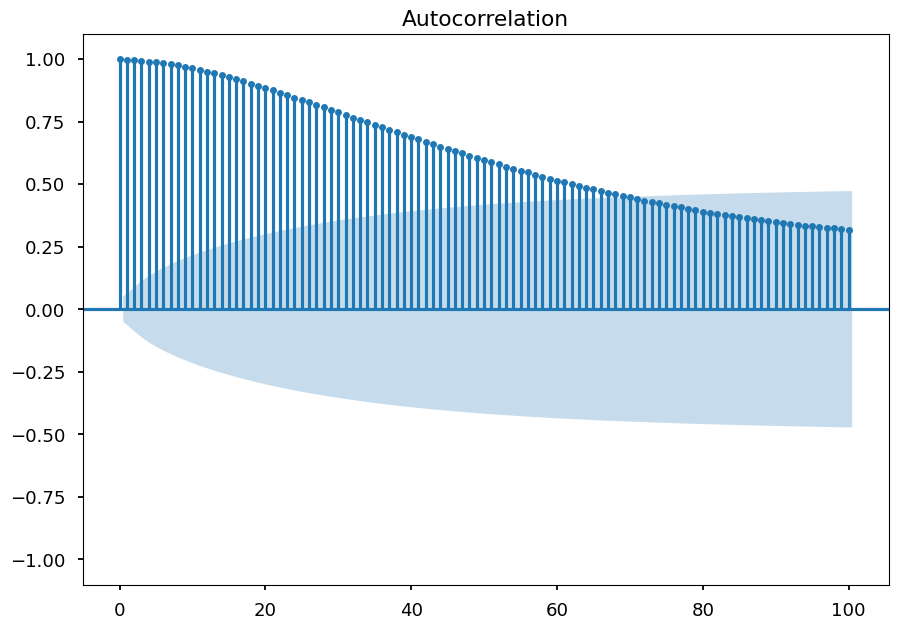

<Figure size 1800x800 with 0 Axes>

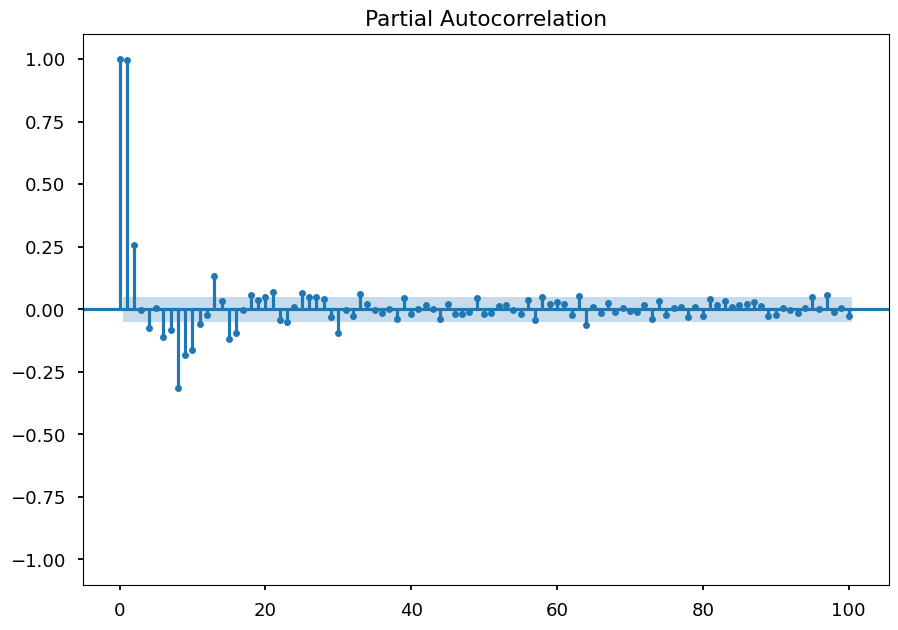

In [ ]:
# Plot autocorrelation
plt.figure(figsize=(20,8))
plot_acf(national_daily['Deaths'].fillna(0), lags=100)  # Change lags as needed
plt.ylim(-1.1,1.1)
plt.title('Autocorrelation')
plt.show()

plt.figure(figsize=(18, 8))
plot_pacf(national_daily['Deaths'].fillna(0), lags=100, method='ywm')
plt.ylim(-1.1,1.1)
plt.title('Partial Autocorrelation')
plt.show()

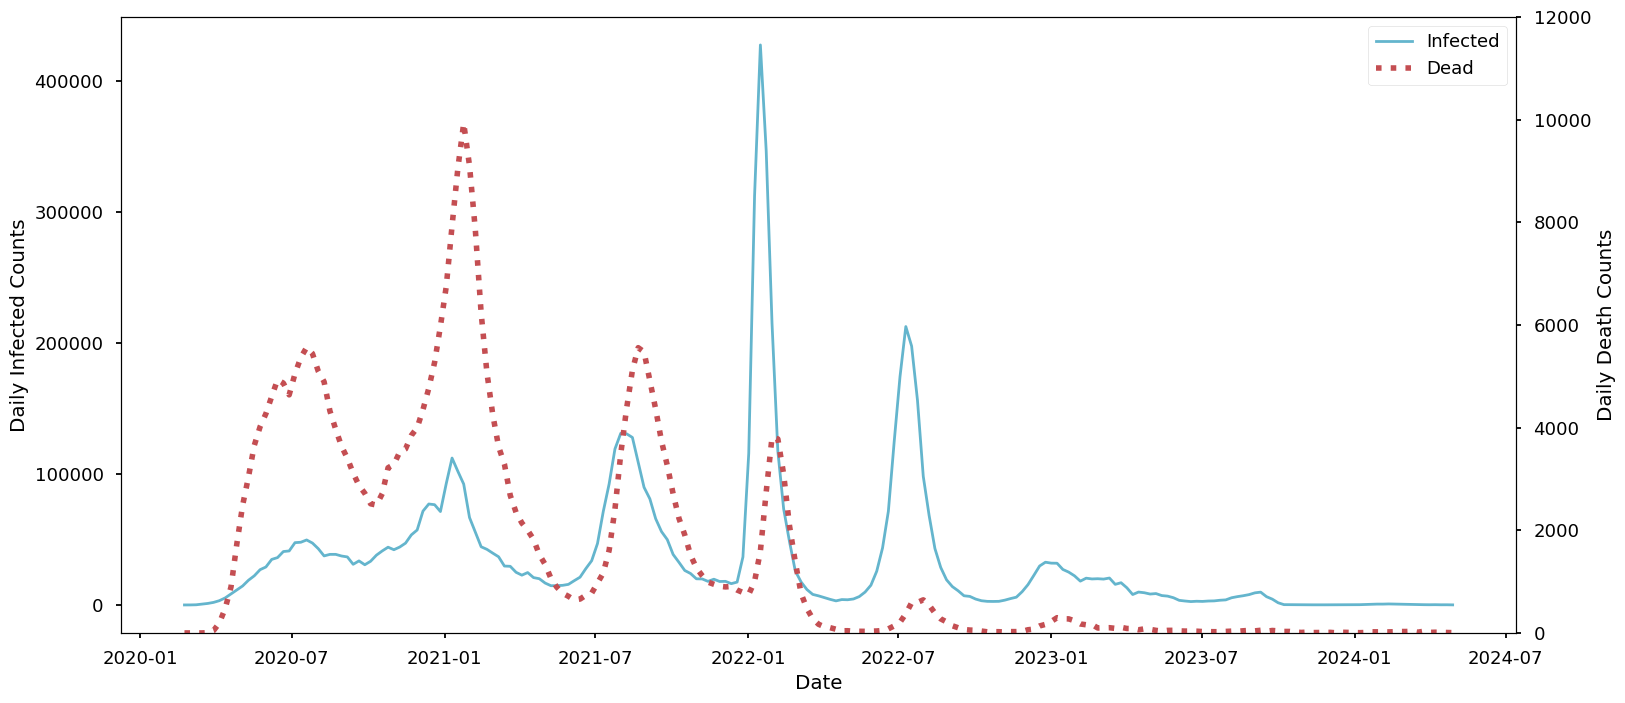

In [ ]:
#Work with weekly sum to reduce variability in data and improve count accuracy
national_weekly = national_daily.resample('W-Sun').sum()

plt.style.use('seaborn-talk')
colors = sns.color_palette()

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(national_weekly['Infections'],label='Infected', color='#64b5cd',linewidth=2, linestyle='-')
ax1.set_ylabel('Daily Infected Counts')

ax2 = ax1.twinx()
ax2.plot(national_weekly['Deaths'],label='Dead', color='#c44e52', linewidth=4, linestyle=':')
ax2.set_ylabel('Daily Death Counts')
ax2.set_ylim(0,12000)

# Getting handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combining handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Displaying legend with combined handles and labels
ax1.legend(handles, labels, loc='upper right')
ax1.set_xlabel('Date')

plt.show()

In [ ]:
print("Mean of infected cases: {:.2f}".format(np.mean(national_weekly['Infections'].values)))
print("Variance of infected cases: {:.2f}".format(np.var(national_weekly['Infections'].values)))
print("Mean of deaths: {:.2f}".format(np.mean(national_weekly['Deaths'].fillna(0).values)))
print("Variance of deaths: {:.2f}".format(np.var(national_weekly['Deaths'].fillna(0).values)))

Mean of infected cases: 35237.96
Variance of infected cases: 3020105285.33
Mean of deaths: 1521.22
Variance of deaths: 4383139.45


<Figure size 2000x800 with 0 Axes>

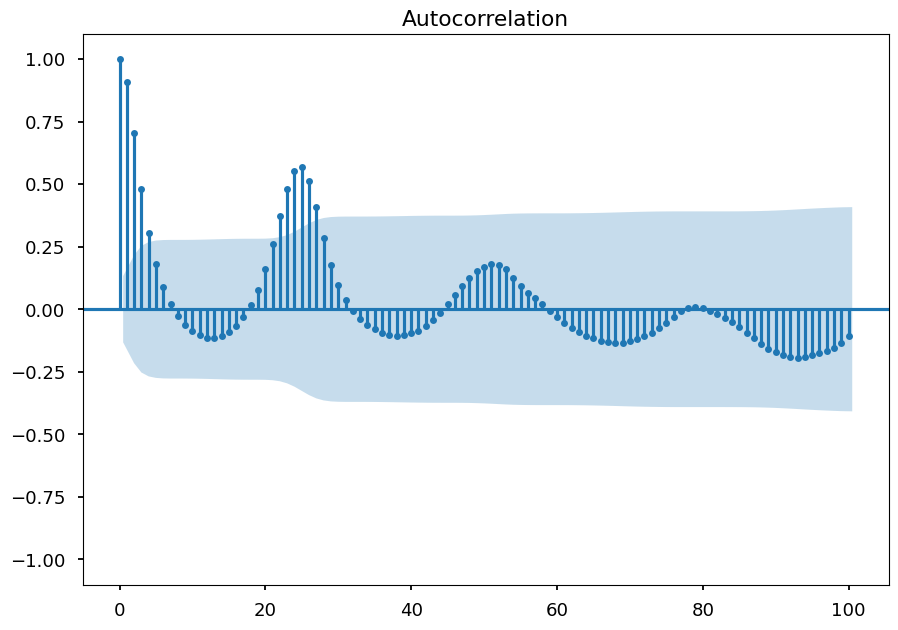

<Figure size 1800x800 with 0 Axes>

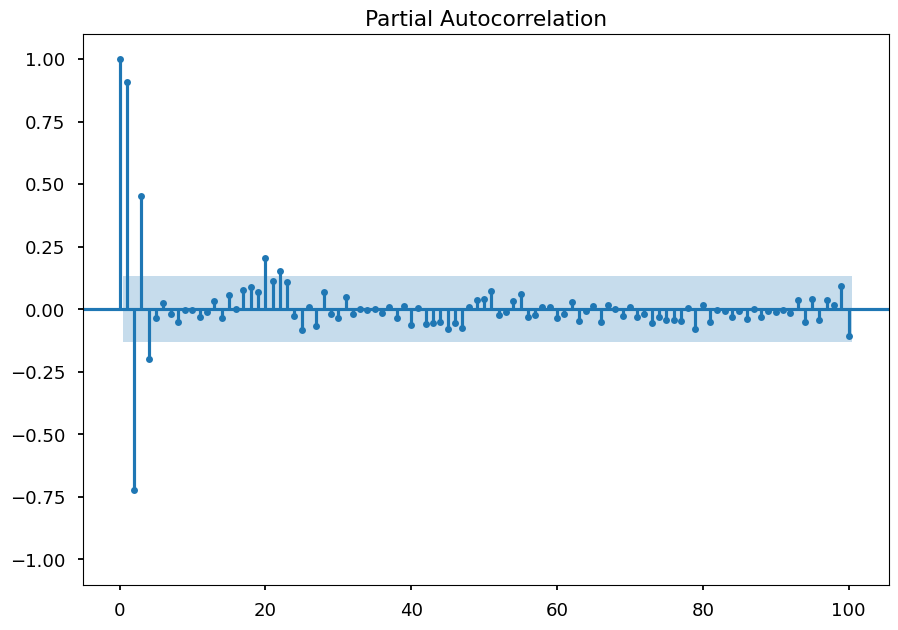

In [ ]:
# Plot autocorrelation
plt.figure(figsize=(20,8))
plot_acf(national_weekly['Infections'], lags=100)  # Change lags as needed
plt.ylim(-1.1,1.1)
plt.title('Autocorrelation')
plt.show()

plt.figure(figsize=(18, 8))
plot_pacf(national_weekly['Infections'], lags=100, method='ywm')
plt.ylim(-1.1,1.1)
plt.title('Partial Autocorrelation')
plt.show()

<Figure size 2000x800 with 0 Axes>

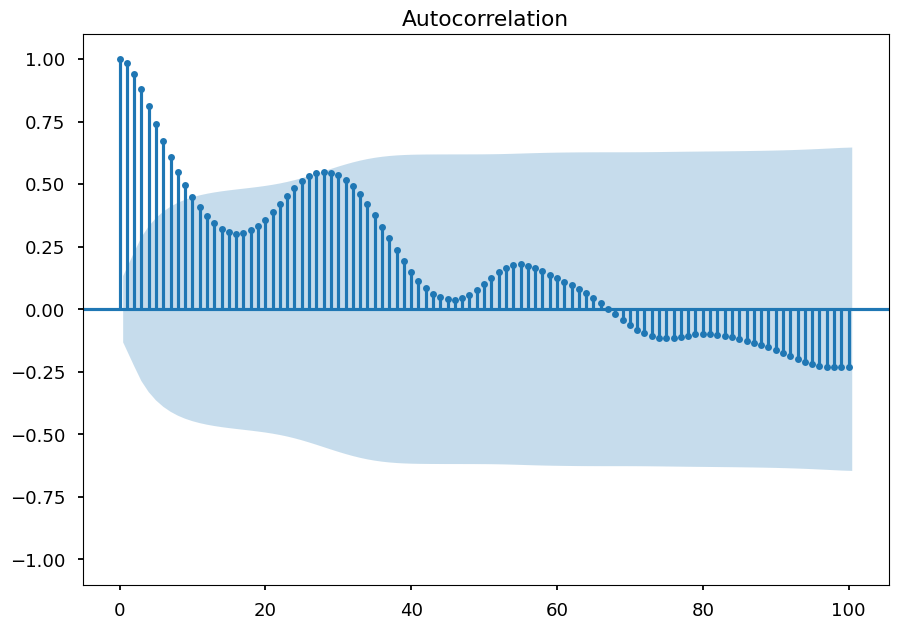

<Figure size 1800x800 with 0 Axes>

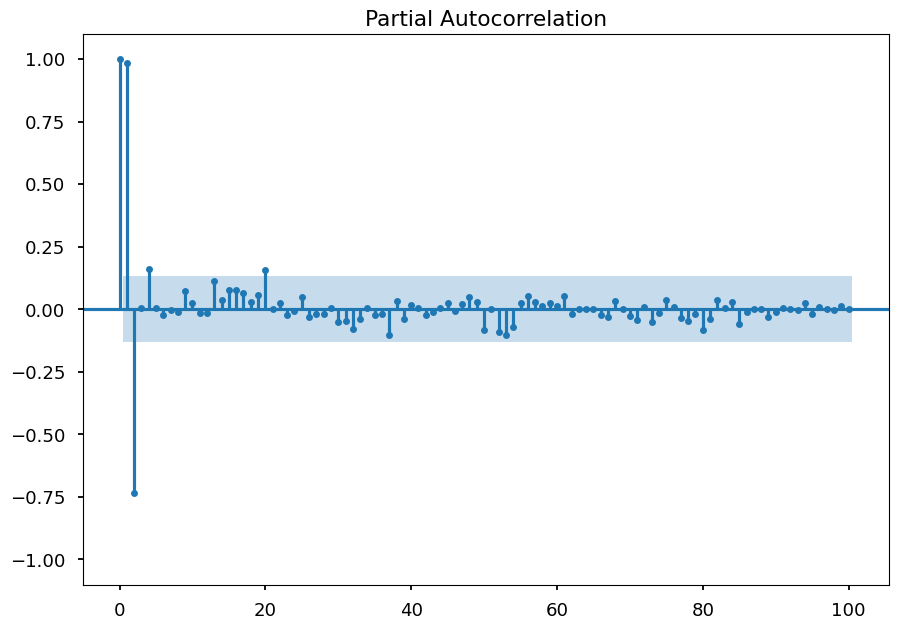

In [ ]:
# Plot autocorrelation
plt.figure(figsize=(20,8))
plot_acf(national_weekly['Deaths'].fillna(0), lags=100)  # Change lags as needed
plt.ylim(-1.1,1.1)
plt.title('Autocorrelation')
plt.show()

plt.figure(figsize=(18, 8))
plot_pacf(national_weekly['Deaths'].fillna(0), lags=100, method='ywm')
plt.ylim(-1.1,1.1)
plt.title('Partial Autocorrelation')
plt.show()

### Understanding best likelihood for the data

In [ ]:
national_weekly['Year'] = national_weekly.index.year
national_daily['Year'] = national_daily.index.year

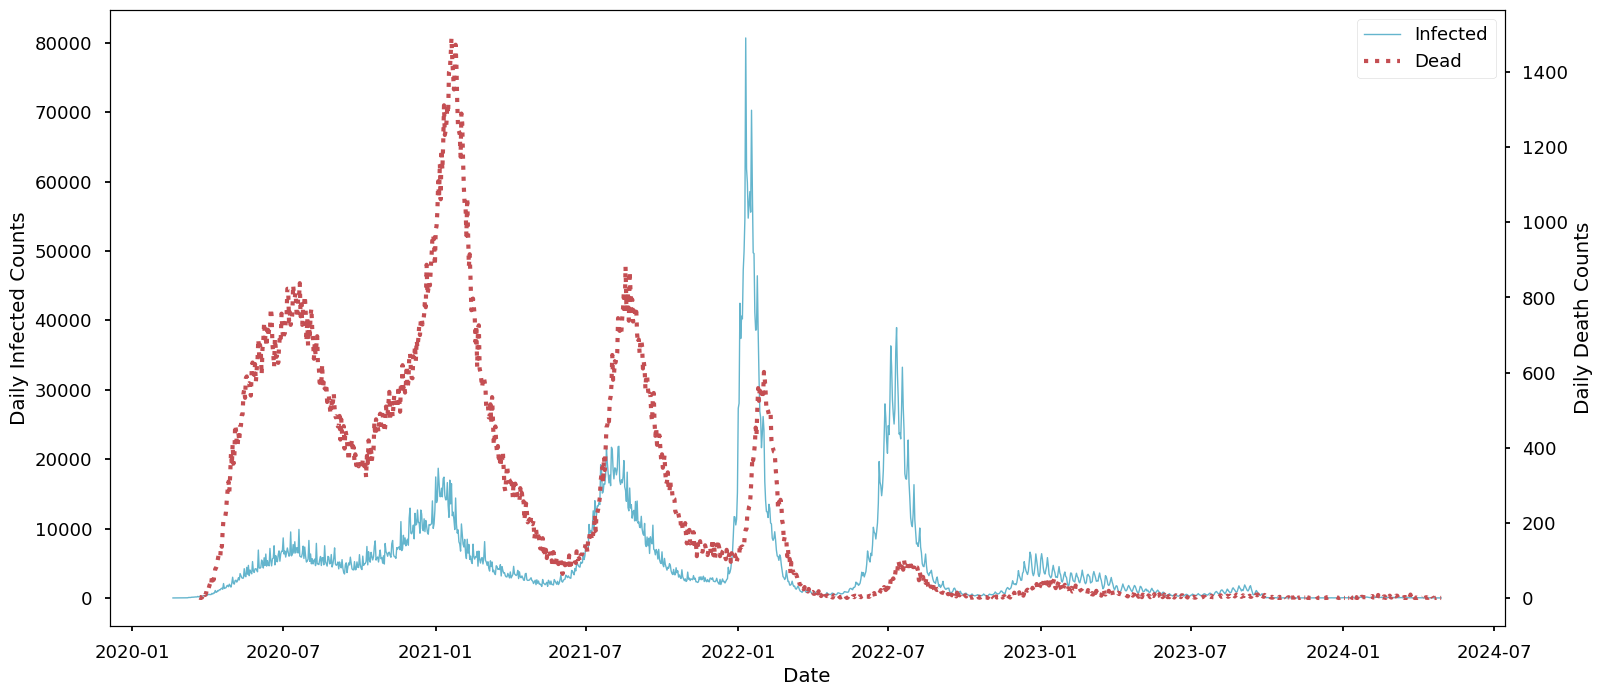

In [ ]:
plt.style.use('seaborn-talk')
colors = sns.color_palette()

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(national_daily['Infections'],label='Infected', color='#64b5cd',linewidth=1, linestyle='-')
ax1.set_ylabel('Daily Infected Counts')

ax2 = ax1.twinx()
ax2.plot(national_daily['Deaths'],label='Dead', color='#c44e52', linewidth=3, linestyle=':')
ax2.set_ylabel('Daily Death Counts')

# Getting handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combining handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Displaying legend with combined handles and labels
ax1.legend(handles, labels, loc='upper right')
ax1.set_xlabel('Date')

plt.show()

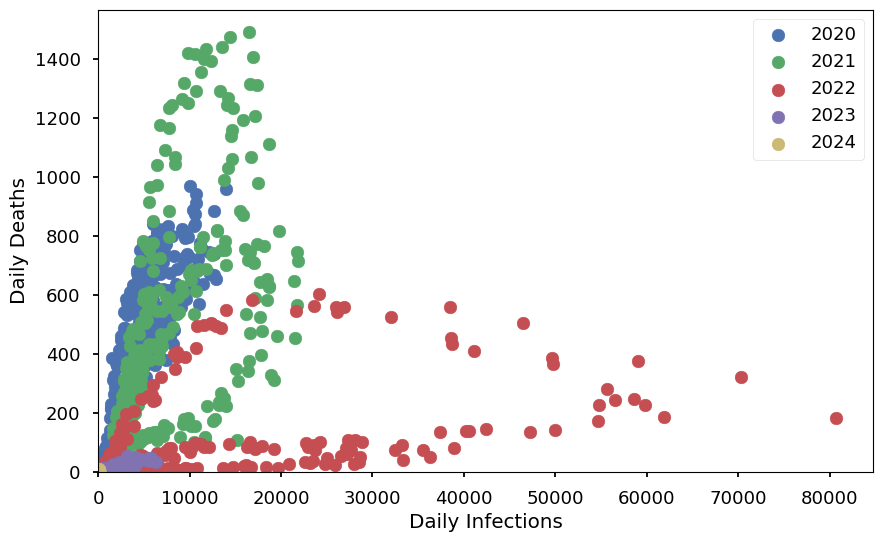

In [ ]:
plt.figure(figsize=(10,6))
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974']
for year, color in zip([2020, 2021, 2022, 2023, 2024], colors):
    year_data = national_daily[national_daily['Year'] == year]
    plt.scatter(year_data['Infections'], year_data['Deaths'], label=year, color=color)

plt.xlim(0,)
plt.ylim(0,)
plt.xlabel('Daily Infections')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

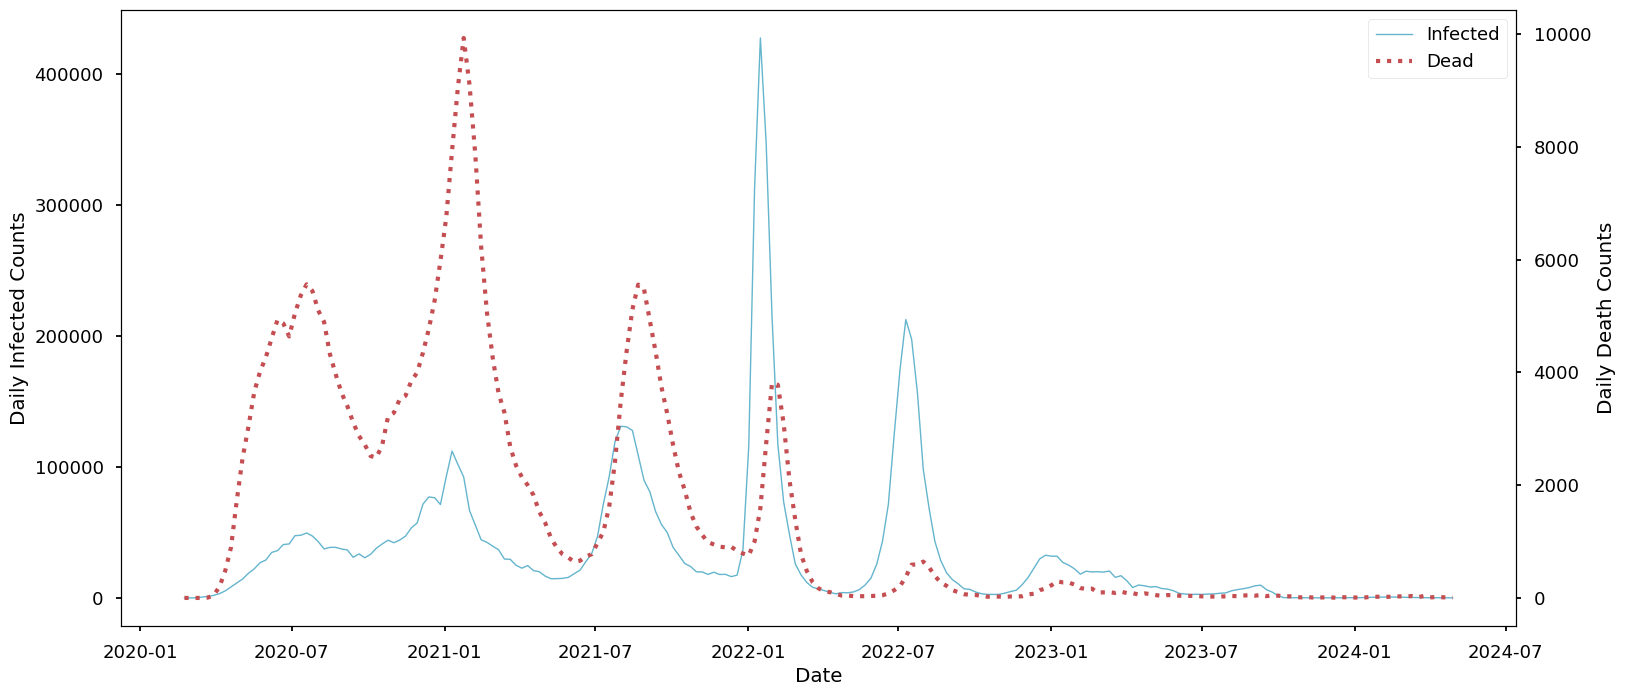

In [ ]:
plt.style.use('seaborn-talk')
colors = sns.color_palette()

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(national_weekly['Infections'],label='Infected', color='#64b5cd',linewidth=1, linestyle='-')
ax1.set_ylabel('Daily Infected Counts')

ax2 = ax1.twinx()
ax2.plot(national_weekly['Deaths'],label='Dead', color='#c44e52', linewidth=3, linestyle=':')
ax2.set_ylabel('Daily Death Counts')

# Getting handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combining handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Displaying legend with combined handles and labels
ax1.legend(handles, labels, loc='upper right')
ax1.set_xlabel('Date')

plt.show()

In [ ]:
#national_weekly.to_csv('national_weekly.csv')

In [ ]:
national_weekly

,Infections,Deaths,Year
2020-02-23,4.0,0.0,2020
2020-03-01,22.0,0.0,2020
2020-03-08,127.0,0.0,2020
2020-03-15,621.0,0.0,2020
2020-03-22,1146.0,6.0,2020
...,...,...,...
2024-03-31,153.0,10.0,2024
2024-04-07,201.0,14.0,2024
2024-04-14,123.0,12.0,2024
2024-04-21,136.0,10.0,2024


In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import nbinom

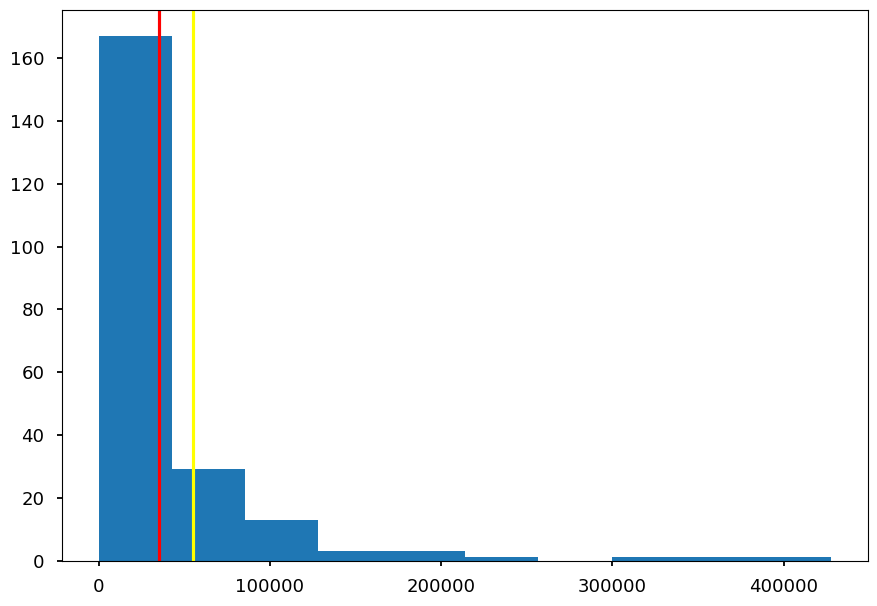

In [ ]:
plt.hist(national_weekly['Infections'], bins=10)
mu = np.mean(national_weekly['Infections'].values)
sigma = np.var(national_weekly['Infections'].values)
plt.axvline(mu, color='red')
plt.axvline(np.sqrt(sigma), color='yellow')



11.939376649046924


(0.0, 400000.0)

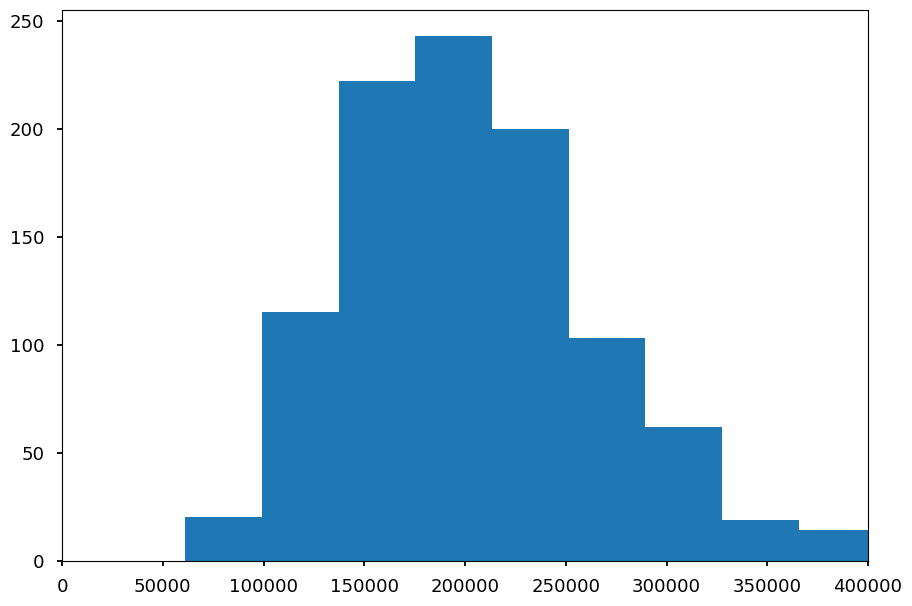

In [ ]:
omega = 10000
theta = 0.2
r = mu / (omega - 1 - theta * mu)
p = 1 / (omega + theta * mu)
print(r)
plt.hist(nbinom(r,p).rvs(1000), bins=10)
plt.xlim(0,400000)

In [ ]:


def neg_log_likelihood(params, data):
    omega, theta = params
    mu = np.mean(national_weekly['Infections'].values)
    r = mu / (omega - 1 - theta * mu)
    p = 1 / (omega + theta * mu)
    return -np.sum(nbinom.logpmf(national_weekly['Infections'].values, r, p))

# Example data (replace with your actual weekly COVID-19 counts)

# Initial guess for omega and theta
initial_guess = [10000, 0.2]

# Minimize negative log-likelihood to estimate omega and theta
result = minimize(neg_log_likelihood, initial_guess, args=(national_weekly['Infections'].values,), method='Nelder-Mead')

# Extract estimated parameters
omega_est, theta_est = result.x

print(f"Estimated omega: {omega_est}")
print(f"Estimated theta: {theta_est}")


Estimated omega: 68842.04313281596
Estimated theta: 2.259443251898277e-07


0.511874398500692


(0.0, 400000.0)

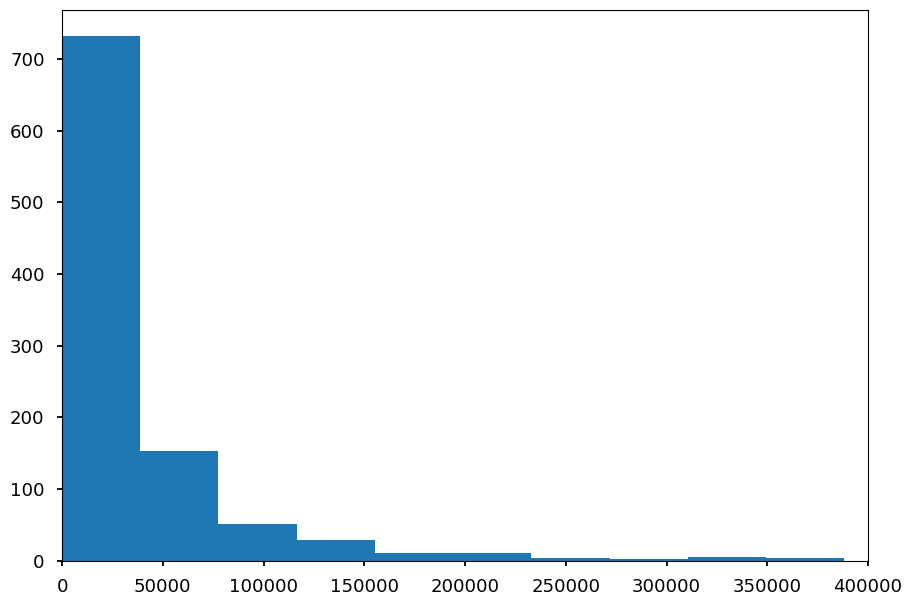

In [ ]:
r = mu / (omega_est - 1 - theta_est * mu)
p = 1 / (omega_est + theta_est * mu)
print(r)
plt.hist(nbinom(r,p).rvs(1000), bins=10)
plt.xlim(0,400000)